In [1]:
import pandas as pd
import numpy as np

In [2]:
metrics_df = pd.read_csv('../data/processed/run_plays_12-3_0.csv')

## Tackle Type
Remove forcedFumbles because the tackler (by definition) does not complete a tackle on the ball carrier. This leaves ambiguity about the ability for the tackler to bring the ball carrier down.

Assists are mapped to tackles.
- Another option to consider: removing all plays where there is an assist. This could make tackles more clear when only one player is amkeing or missing a tackle

In [3]:
metrics_df['event'].replace('assist', 'tackle', inplace=True)

In [4]:
metrics_df.drop(metrics_df[metrics_df['event'] == 'forcedFumble'].index, inplace=True)

## Time to Contact
One tackler had a speed of 0 at the frame of interest. This causes the time to contact to be infinite. To avoid errors in plotting, this infinite value is replaced with 1000.

In [5]:
metrics_df['tackler_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)
metrics_df['ball_carrier_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)

In [6]:
# must be within field of play, and less than 5 seconds from contact point at current speed
metrics_df['make_contact'] = ((metrics_df['x_contact'] < 110) & 
                              (metrics_df['x_contact'] > 0) &
                              (abs(metrics_df['diff_time_to_contact']) < 5)
                             )

## Momentum
The momentum_x_diff is calculated by subtracting the tackler x momentum from the ball carrier x momentum. But the tackler "should" be moving in the opposite direction as the ball carrier, so the tackler momentum "should" be negative. To acheive the correct signs at the end of the calculation the momentums in the x direction should be added.

In [7]:
metrics_df['momentum_x_add'] = metrics_df['momentum_x_ball_carrier'] + metrics_df['momentum_x']

## Reduce to Contact Only

Remove examples where the contact point is behind either player or outside of the bounds of the field.

In [ ]:
metrics_df = metrics_df[metrics_df['in_field'] & (metrics_df['behind_player'] == False)]

# Plotting

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def hist(df, metric):
    sns.histplot(df, x=metric, hue="event", kde=True)
    plt.show()

In [10]:
def violin(df, metric):
    sns.violinplot(df, x=metric, y="event")
    plt.show()

In [11]:
def box(df, metric):
    sns.boxplot(df, x=metric, y="event")
    plt.show()

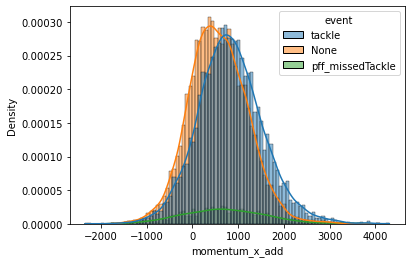

In [93]:
hist_2(metrics_df, "momentum_x_add")

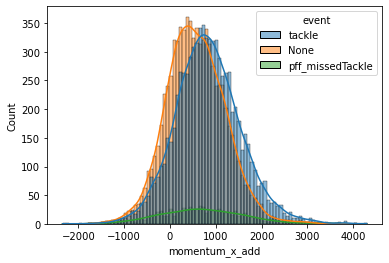

In [12]:
hist(metrics_df, "momentum_x_add")

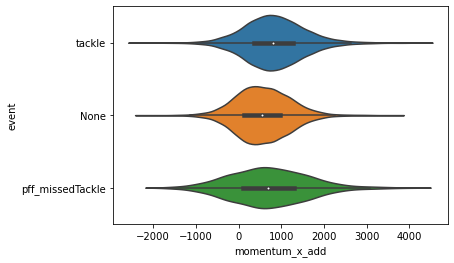

In [13]:
violin(metrics_df, "momentum_x_add")

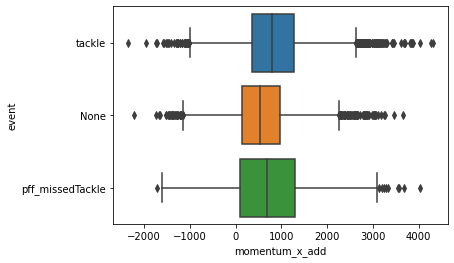

In [14]:
box(metrics_df, "momentum_x_add")

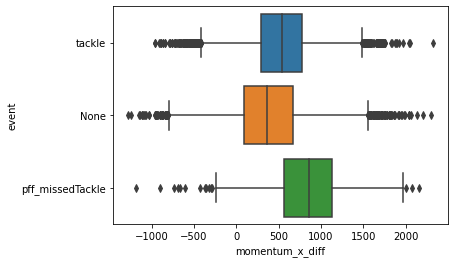

In [15]:
box(metrics_df, "momentum_x_diff")

In [306]:
metrics_df.columns

Index(['gameId', 'playId', 'event', 'nflId', 'frameId', 'displayName', 'club',
       'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'dir_cos', 'dir_sin', 'dir_tan',
       'slope', 'force', 'force_x', 'force_y', 'momentum', 'momentum_x',
       'momentum_y', 'in_phase', 'nflId_ball_carrier',
       'displayName_ball_carrier', 'club_ball_carrier', 'x_ball_carrier',
       'y_ball_carrier', 's_ball_carrier', 'a_ball_carrier',
       'dis_ball_carrier', 'o_ball_carrier', 'dir_ball_carrier',
       'dir_cos_ball_carrier', 'dir_sin_ball_carrier', 'dir_tan_ball_carrier',
       'slope_ball_carrier', 'force_ball_carrier', 'force_x_ball_carrier',
       'force_y_ball_carrier', 'momentum_ball_carrier',
       'momentum_x_ball_carrier', 'momentum_y_ball_carrier',
       'in_phase_ball_carrier', 'tackler_to_ball_carrier_dist', 'force_diff',
       'force_sum', 'force_x_diff', 'force_y_diff', 'force_x_sum',
       'force_y_sum', 'momentum_diff', 'momentum_sum', 'momentum_x_diff',
       'momentum_y_diff'

In [28]:
single_player_metric_columns = [
       'x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'force', 'force_x', 'force_y', 'momentum', 'momentum_x',
       'momentum_y', 'in_phase', 'x_ball_carrier',
       'y_ball_carrier', 's_ball_carrier', 'a_ball_carrier',
       'dis_ball_carrier', 'o_ball_carrier', 'dir_ball_carrier',
       'force_ball_carrier', 'force_x_ball_carrier',
       'force_y_ball_carrier', 'momentum_ball_carrier',
       'momentum_x_ball_carrier', 'momentum_y_ball_carrier',
       'in_phase_bal_carrier', 'contact_angle_momentum']
player_diff_metric_columns = [
       'tackler_to_ball_carrier_dist', 'force_diff', 'force_sum',
       'force_x_diff', 'force_x_sum', 'force_y_diff', 'force_y_sum',
       'momentum_diff', 'momentum_sum', 'momentum_x_diff', 'momentum_x_sum',
       'momentum_y_diff', 'momentum_y_sum',
       'x_contact', 'y_contact', 'tackler_to_contact_dist',
       'ball_carrier_to_contact_dist', 'tackler_time_to_contact',
       'ball_carrier_time_to_contact', 'diff_time_to_contact', 'contact_angle',
       'contact_angle_cos', 'contact_angle_force', 'contact_angle_force_y',
       'contact_angle_force_y_abs',
       'contact_angle_force_diff', 'contact_angle_force_sum', 
       'contact_angle_momentum', 'contact_angle_momentum_y',
       'contact_angle_momentum_y_abs'
       'contact_angle_momentum_diff', 'contact_angle_momentum_sum',
       'contact_angle_momentum_sum']

x


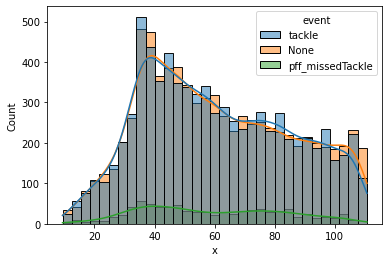

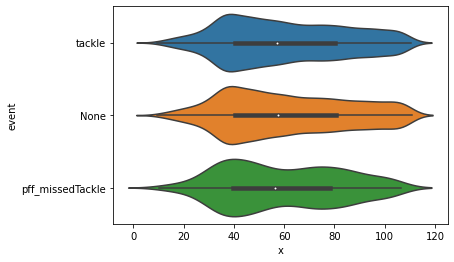

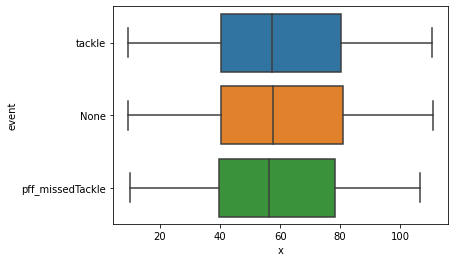

----------------------------------------------------
----------------------------------------------------
y


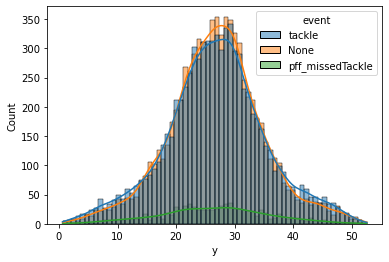

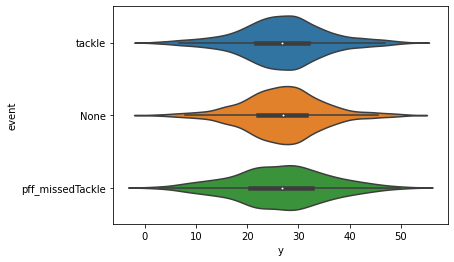

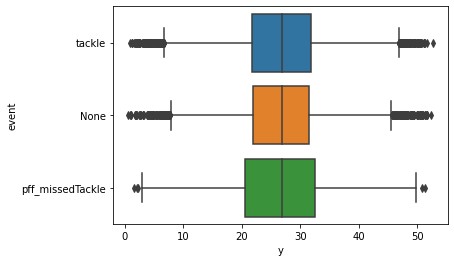

----------------------------------------------------
----------------------------------------------------
s


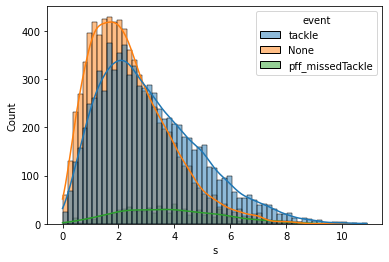

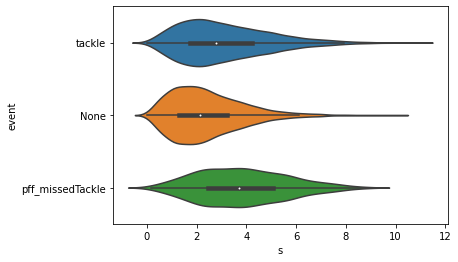

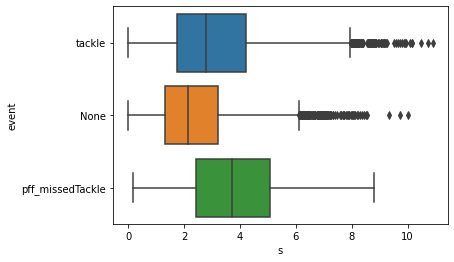

----------------------------------------------------
----------------------------------------------------
a


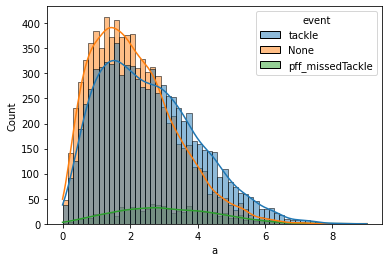

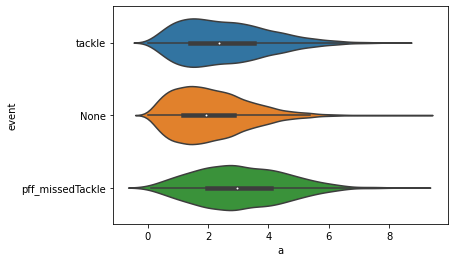

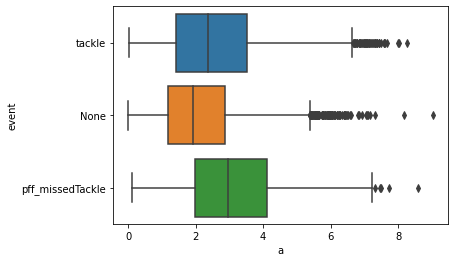

----------------------------------------------------
----------------------------------------------------
dis


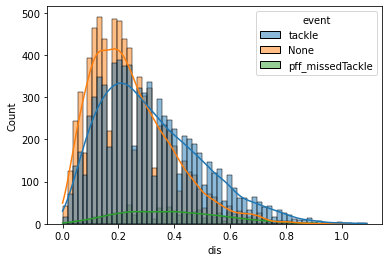

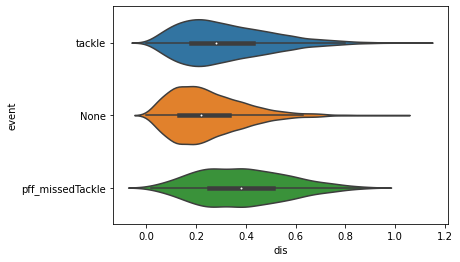

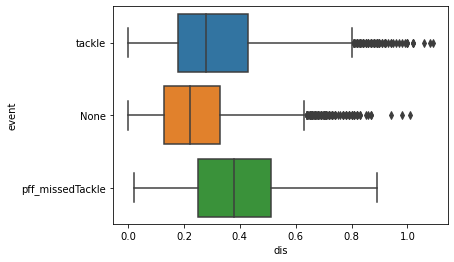

----------------------------------------------------
----------------------------------------------------
o


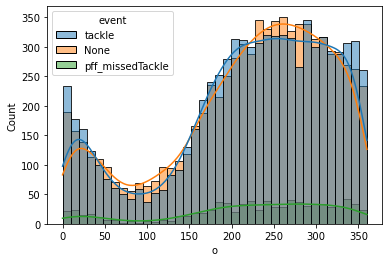

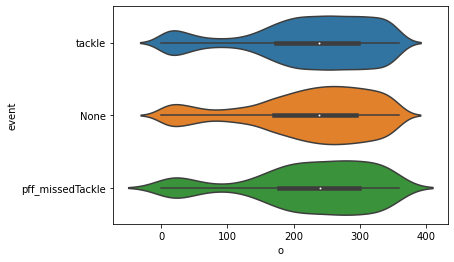

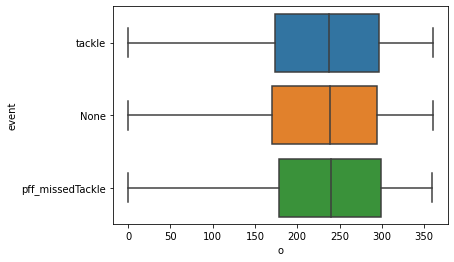

----------------------------------------------------
----------------------------------------------------
dir


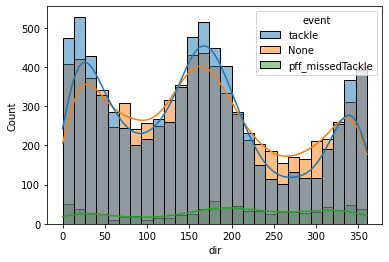

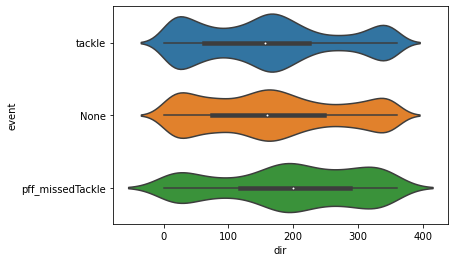

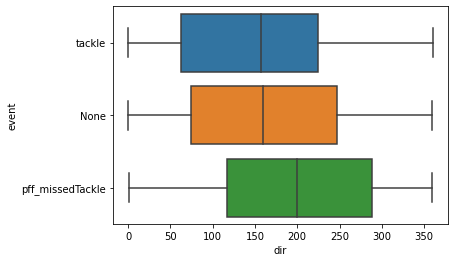

----------------------------------------------------
----------------------------------------------------
force


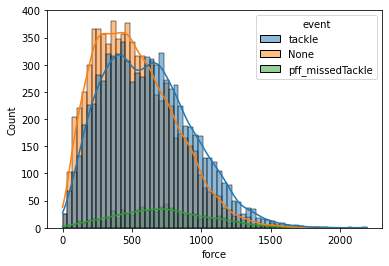

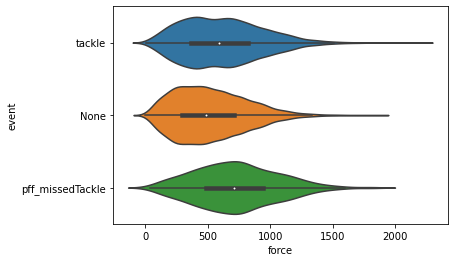

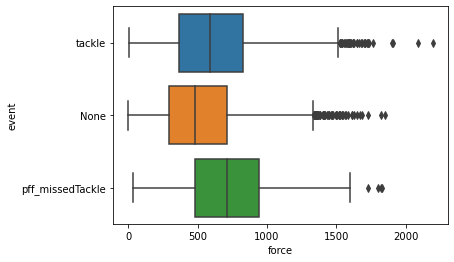

----------------------------------------------------
----------------------------------------------------
force_x


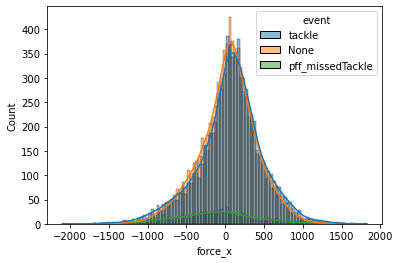

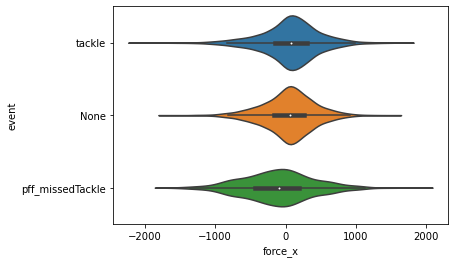

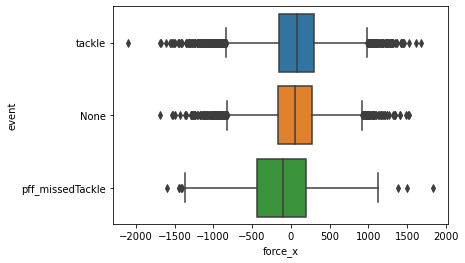

----------------------------------------------------
----------------------------------------------------
force_y


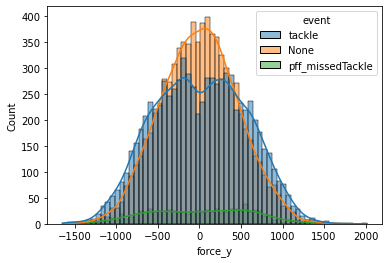

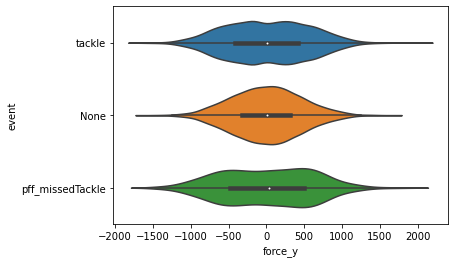

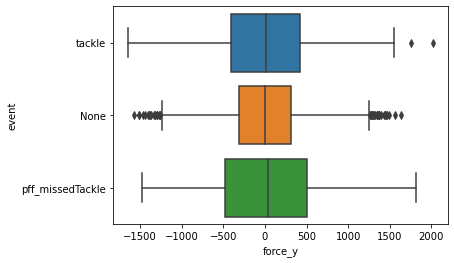

----------------------------------------------------
----------------------------------------------------
momentum


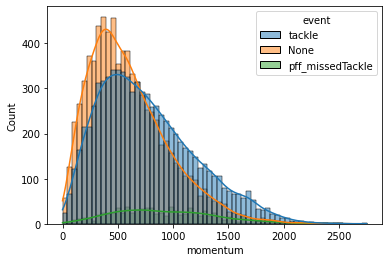

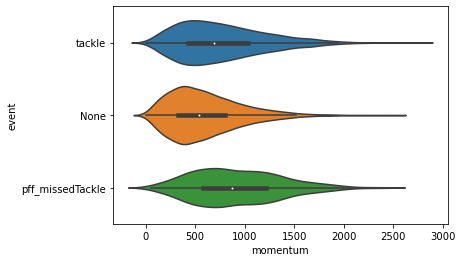

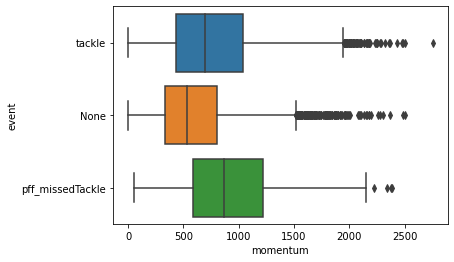

----------------------------------------------------
----------------------------------------------------
momentum_x


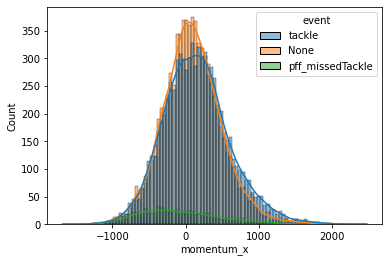

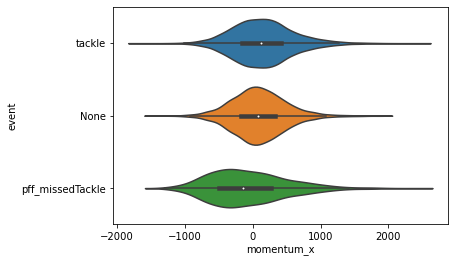

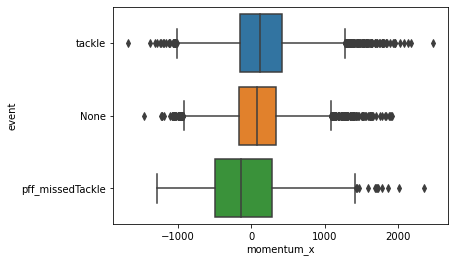

----------------------------------------------------
----------------------------------------------------
momentum_y


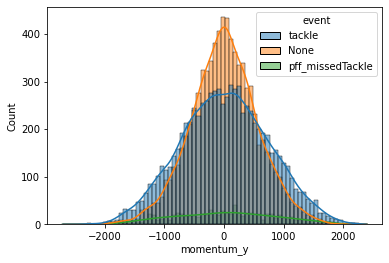

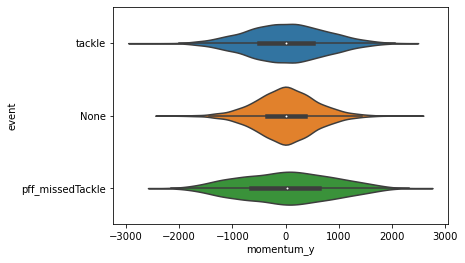

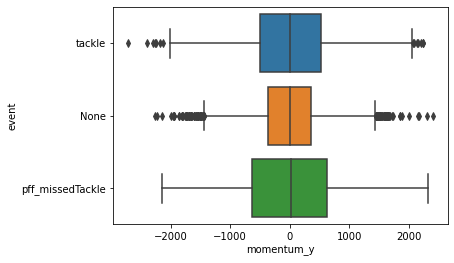

----------------------------------------------------
----------------------------------------------------
in_phase


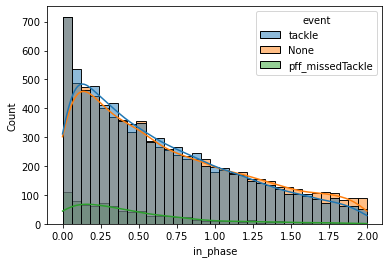

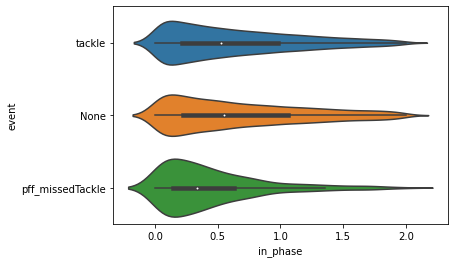

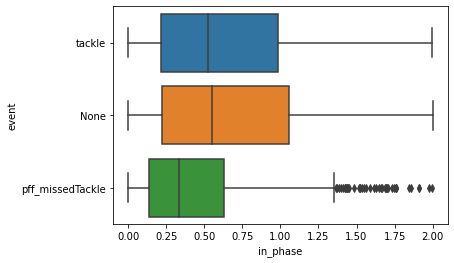

----------------------------------------------------
----------------------------------------------------
x_ball_carrier


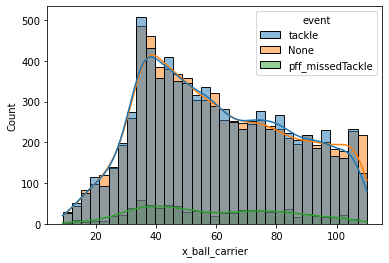

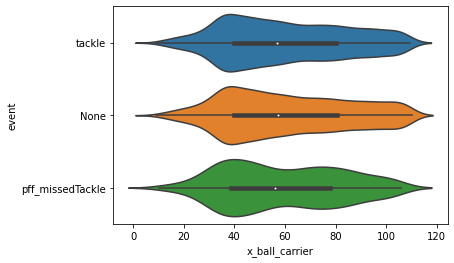

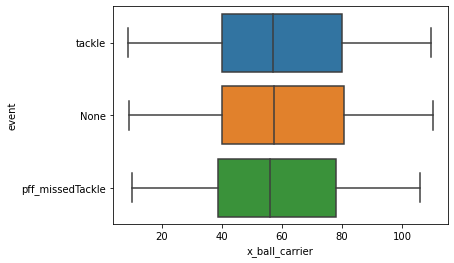

----------------------------------------------------
----------------------------------------------------
y_ball_carrier


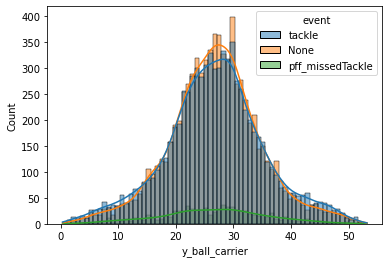

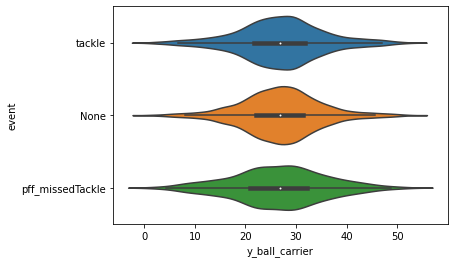

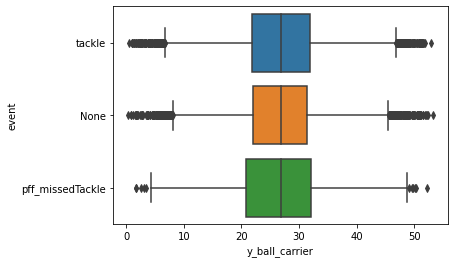

----------------------------------------------------
----------------------------------------------------
s_ball_carrier


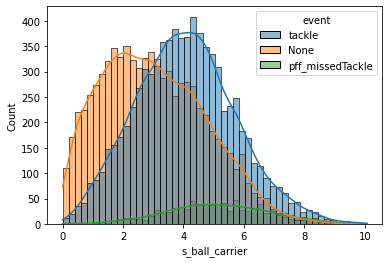

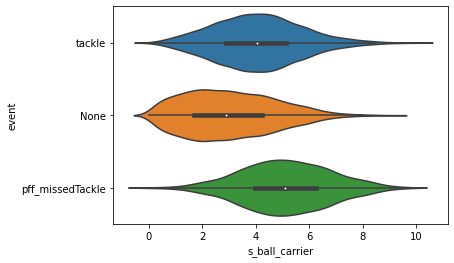

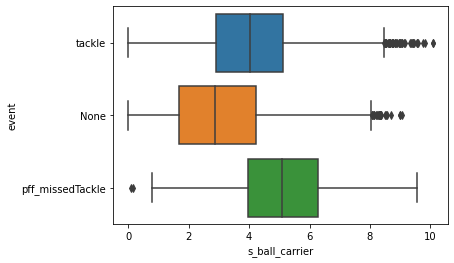

----------------------------------------------------
----------------------------------------------------
a_ball_carrier


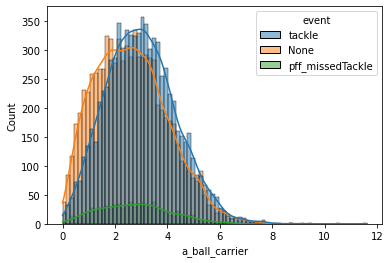

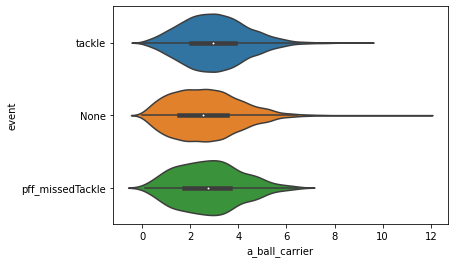

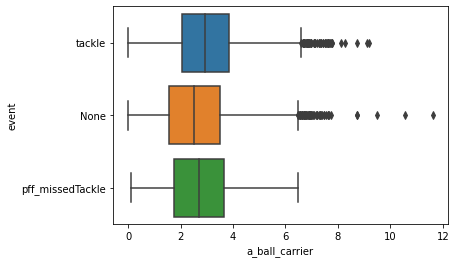

----------------------------------------------------
----------------------------------------------------
dis_ball_carrier


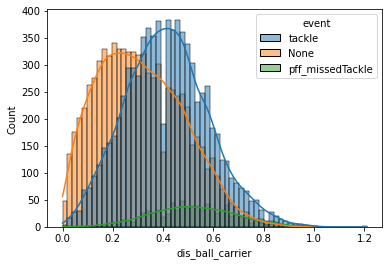

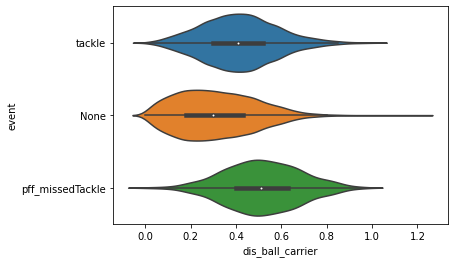

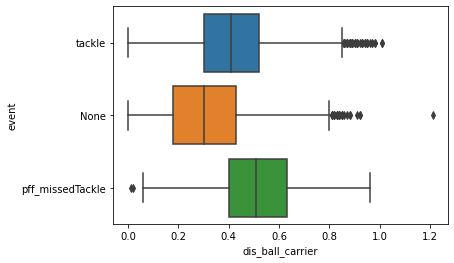

----------------------------------------------------
----------------------------------------------------
o_ball_carrier


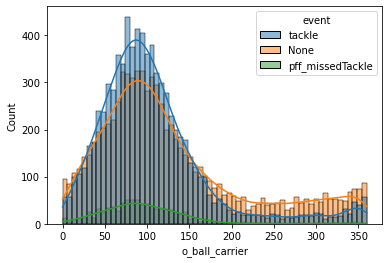

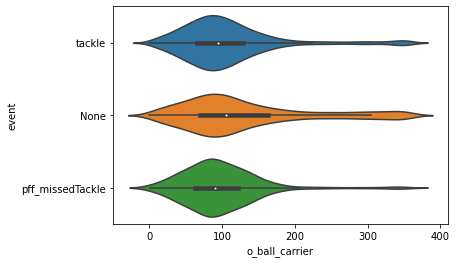

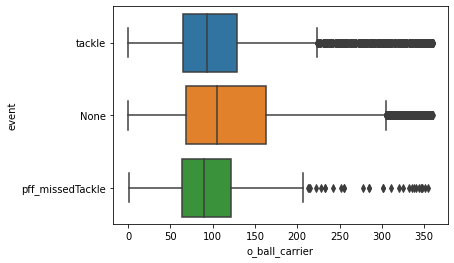

----------------------------------------------------
----------------------------------------------------
dir_ball_carrier


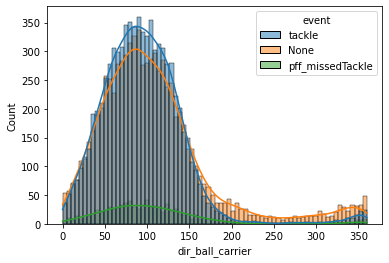

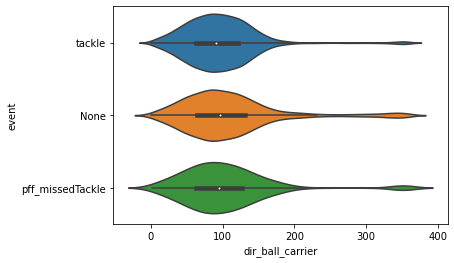

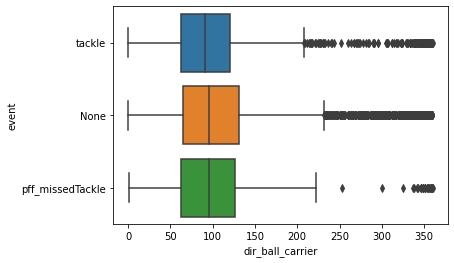

----------------------------------------------------
----------------------------------------------------
force_ball_carrier


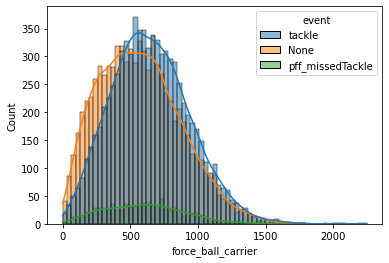

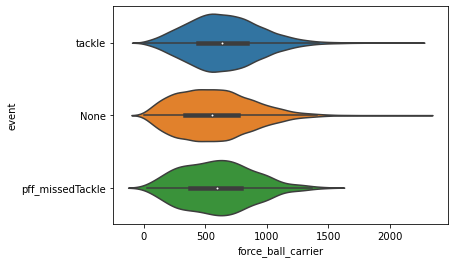

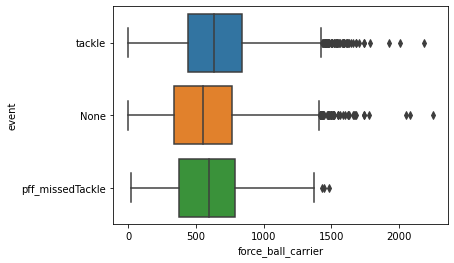

----------------------------------------------------
----------------------------------------------------
force_x_ball_carrier


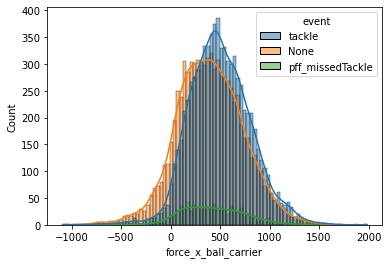

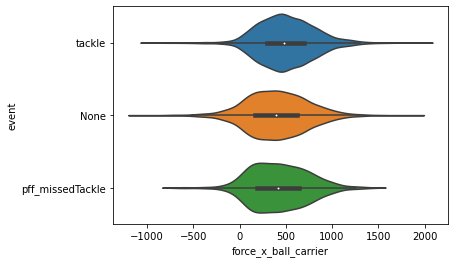

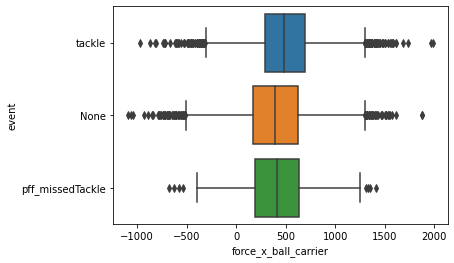

----------------------------------------------------
----------------------------------------------------
force_y_ball_carrier


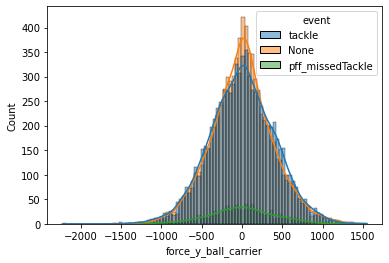

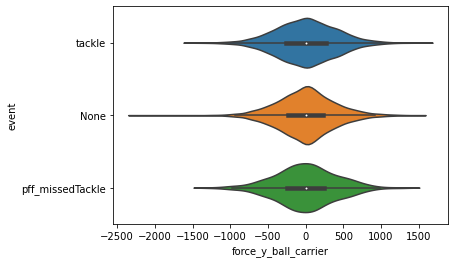

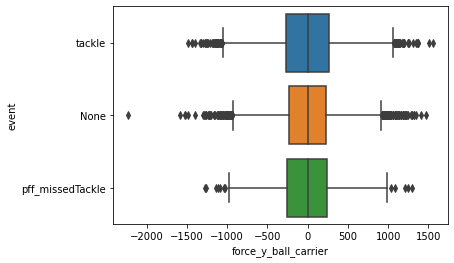

----------------------------------------------------
----------------------------------------------------
momentum_ball_carrier


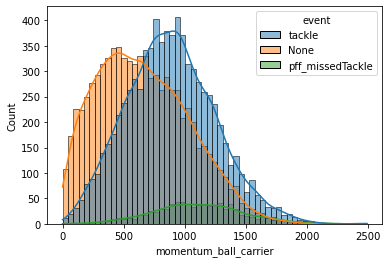

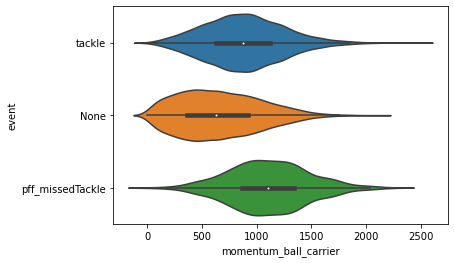

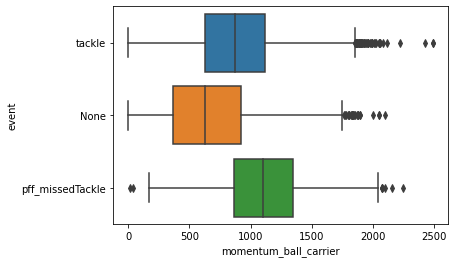

----------------------------------------------------
----------------------------------------------------
momentum_x_ball_carrier


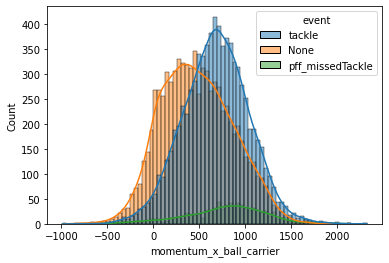

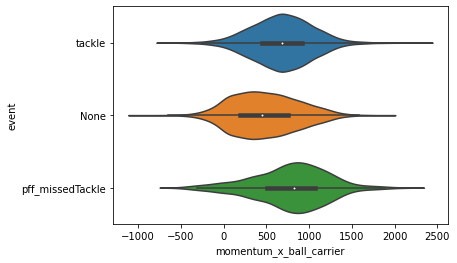

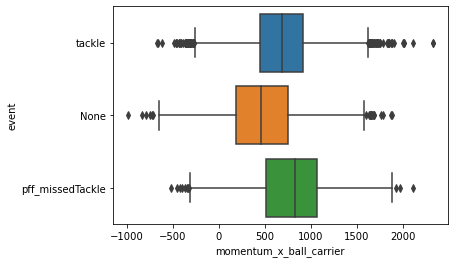

----------------------------------------------------
----------------------------------------------------
momentum_y_ball_carrier


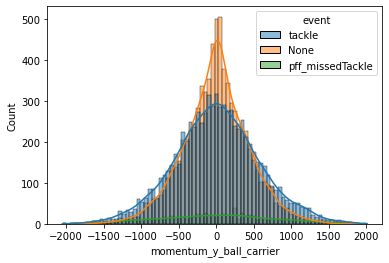

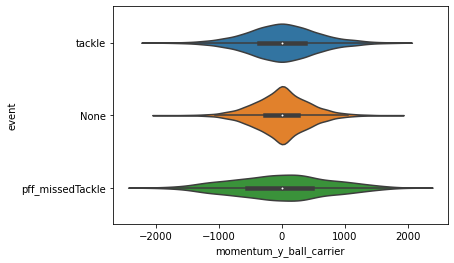

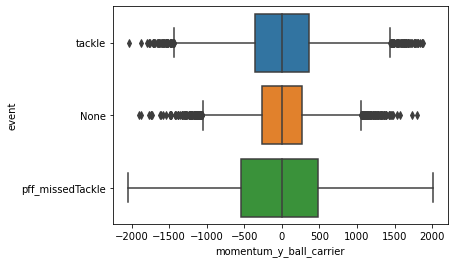

----------------------------------------------------
----------------------------------------------------
contact_angle_cos


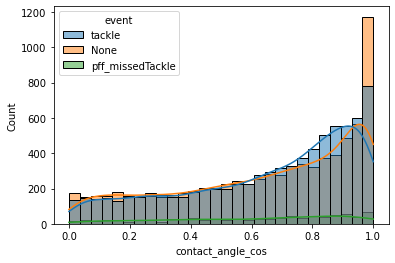

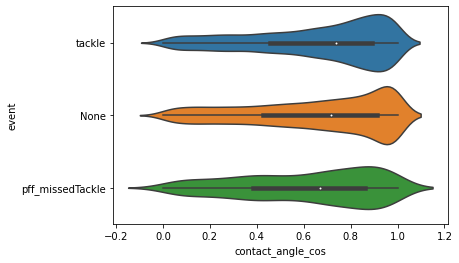

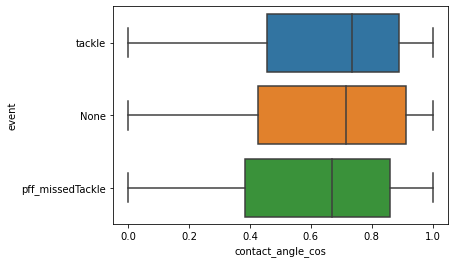

----------------------------------------------------
----------------------------------------------------
contact_angle_force


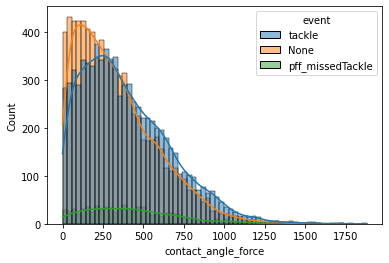

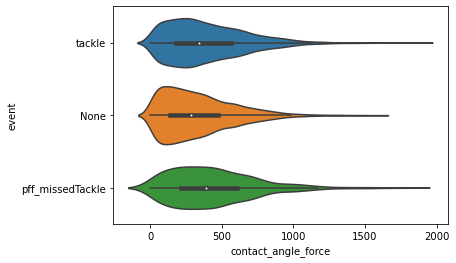

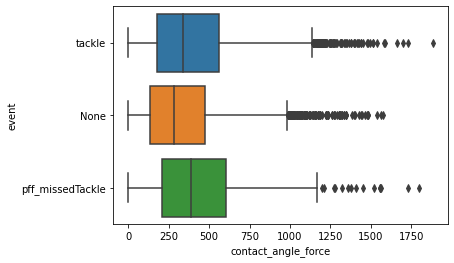

----------------------------------------------------
----------------------------------------------------


In [18]:
for metric in single_player_metric_columns:
    print(metric)
    hist(metrics_df, metric)
    violin(metrics_df, metric)
    box(metrics_df, metric)
    print("----------------------------------------------------")
    print("----------------------------------------------------")

tackler_to_ball_carrier_dist


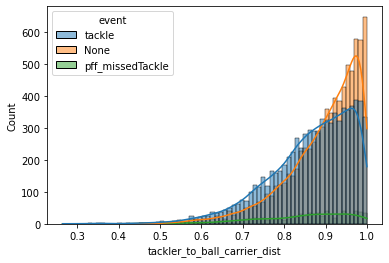

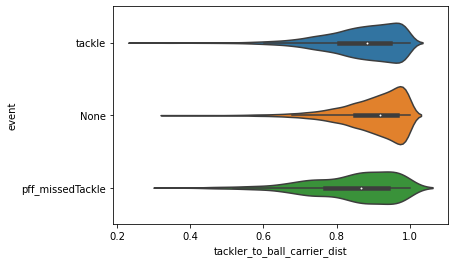

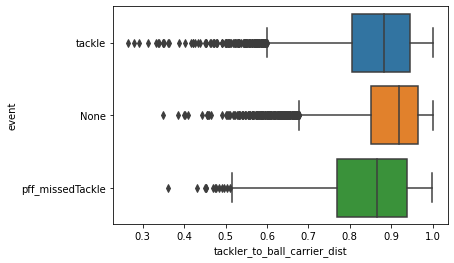

----------------------------------------------------
----------------------------------------------------
force_diff


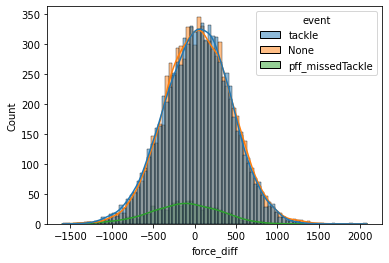

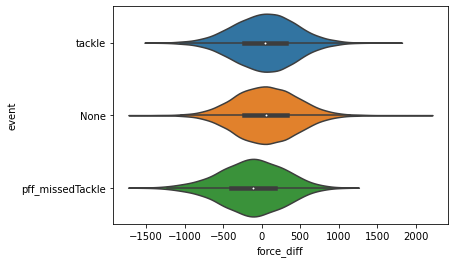

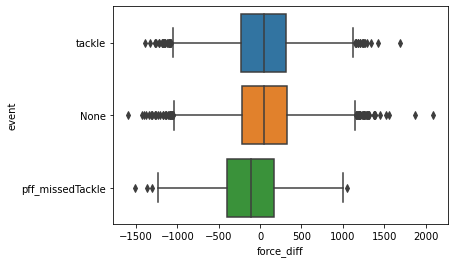

----------------------------------------------------
----------------------------------------------------
force_x_diff


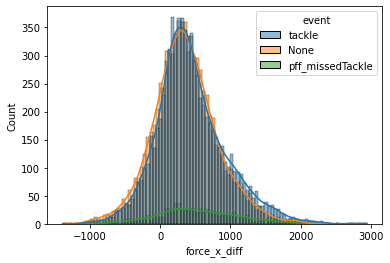

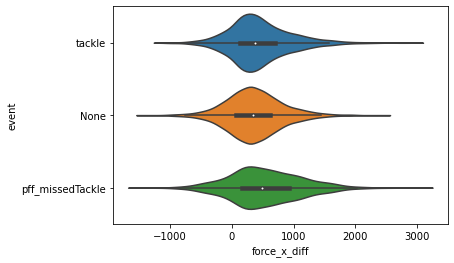

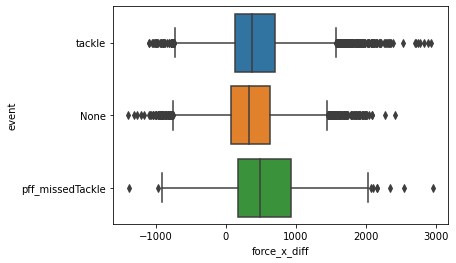

----------------------------------------------------
----------------------------------------------------
force_y_diff


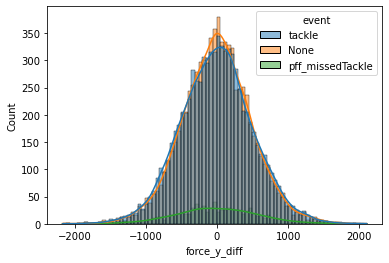

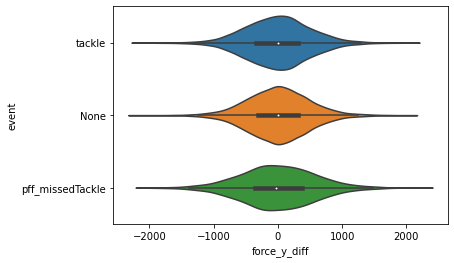

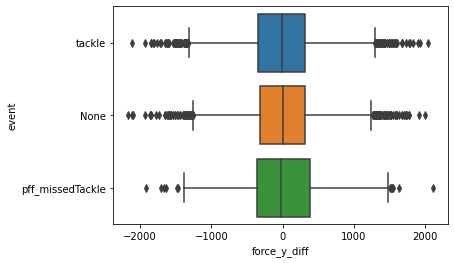

----------------------------------------------------
----------------------------------------------------
momentum_diff


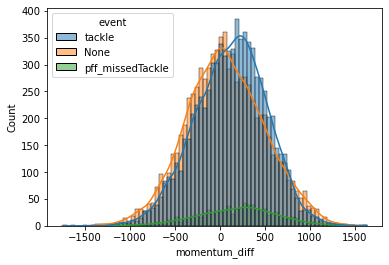

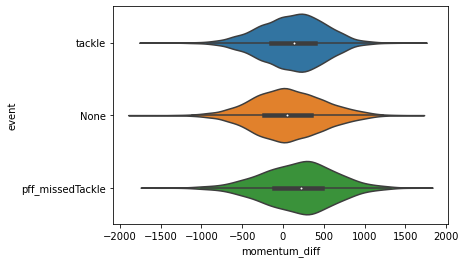

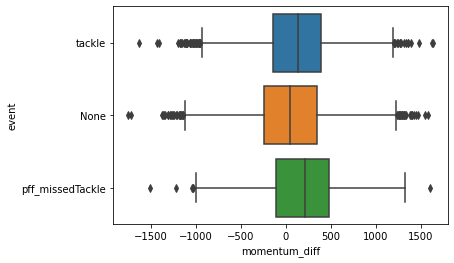

----------------------------------------------------
----------------------------------------------------
momentum_x_diff


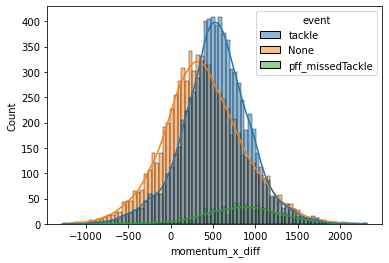

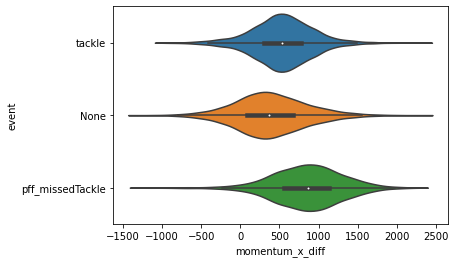

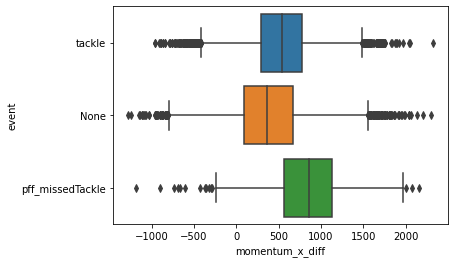

----------------------------------------------------
----------------------------------------------------
momentum_y_diff


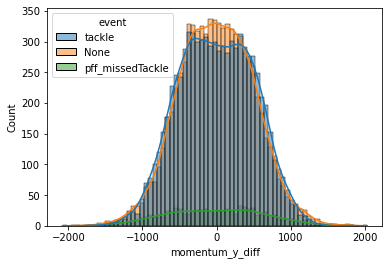

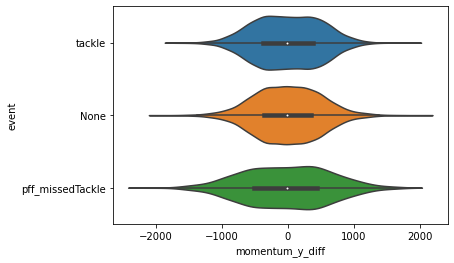

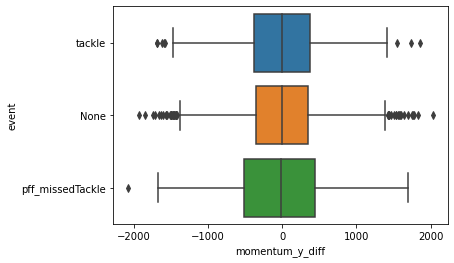

----------------------------------------------------
----------------------------------------------------
x_contact


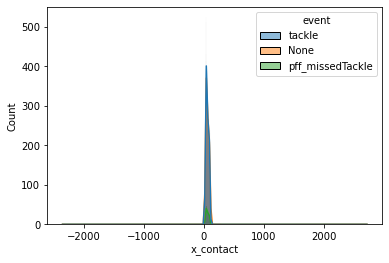

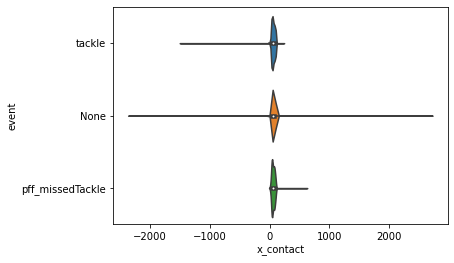

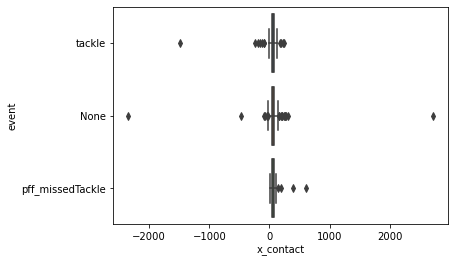

----------------------------------------------------
----------------------------------------------------
y_contact


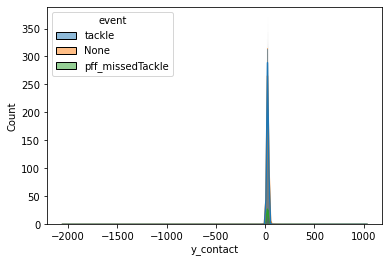

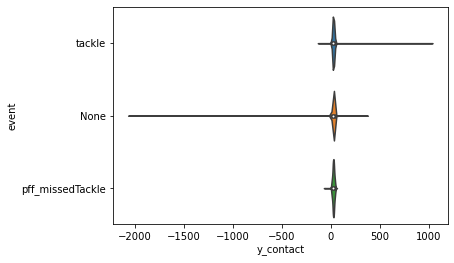

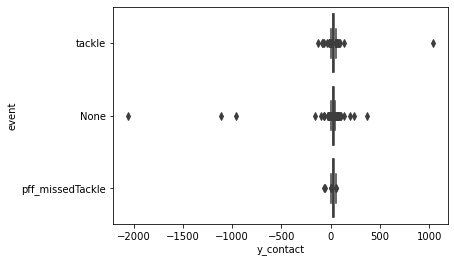

----------------------------------------------------
----------------------------------------------------
tackler_to_contact_dist


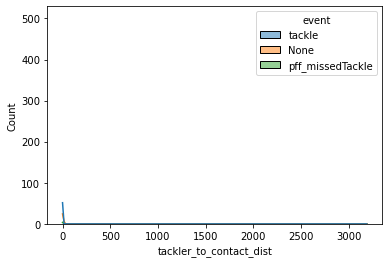

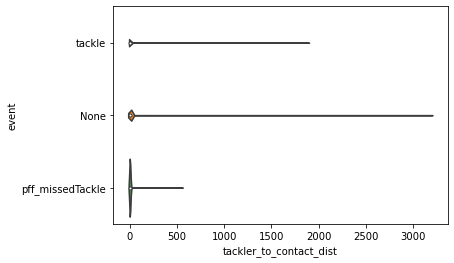

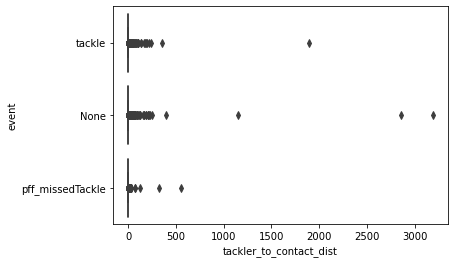

----------------------------------------------------
----------------------------------------------------
ball_carrier_to_contact_dist


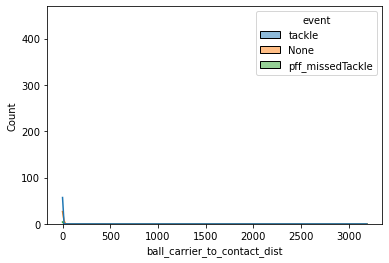

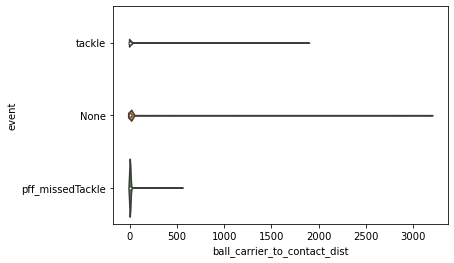

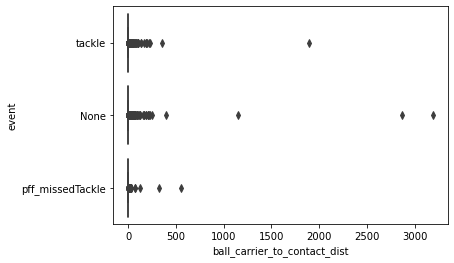

----------------------------------------------------
----------------------------------------------------
tackler_time_to_contact


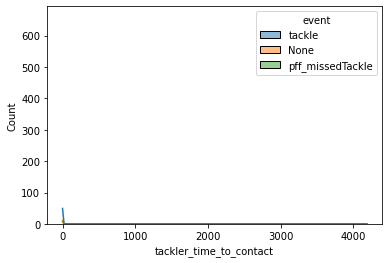

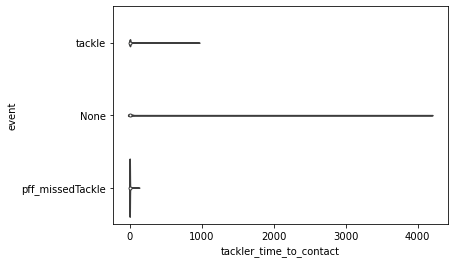

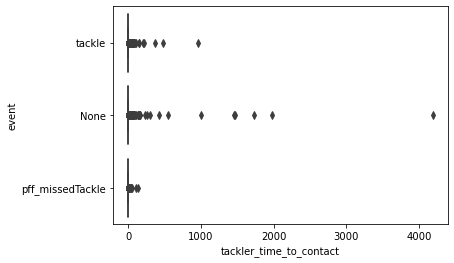

----------------------------------------------------
----------------------------------------------------
ball_carrier_time_to_contact


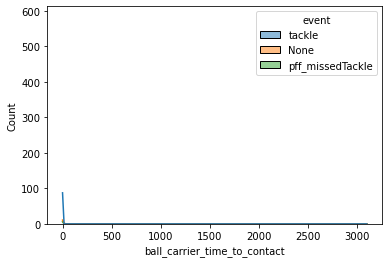

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

In [19]:
for metric in player_diff_metric_columns:
    print(metric)
    hist(metrics_df, metric)
    violin(metrics_df, metric)
    box(metrics_df, metric)
    print("----------------------------------------------------")
    print("----------------------------------------------------")

tackler_to_ball_carrier_dist


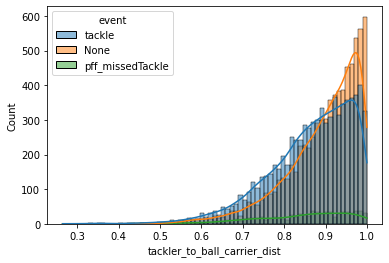

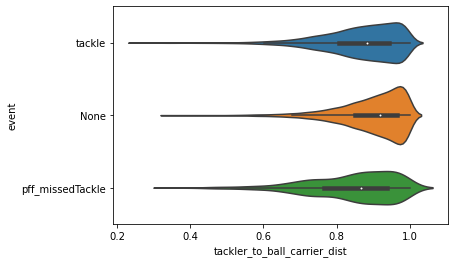

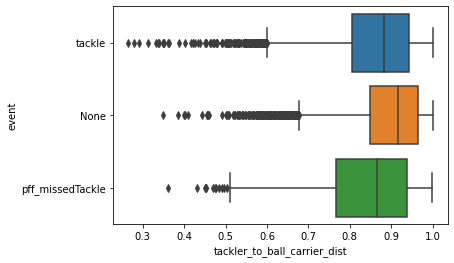

----------------------------------------------------
----------------------------------------------------
force_diff


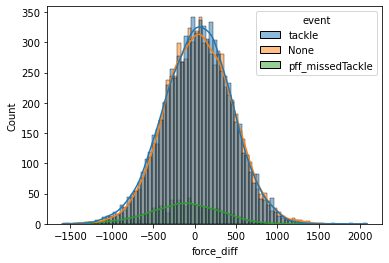

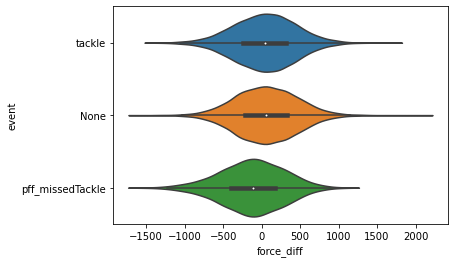

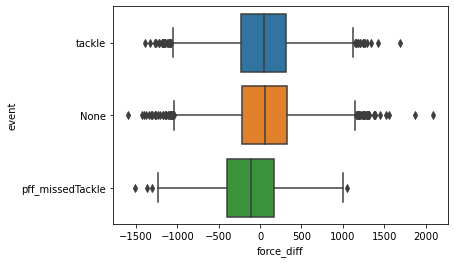

----------------------------------------------------
----------------------------------------------------
force_x_diff


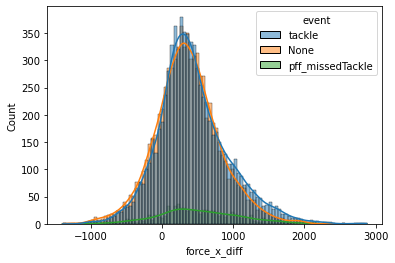

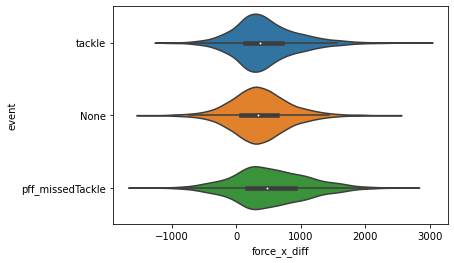

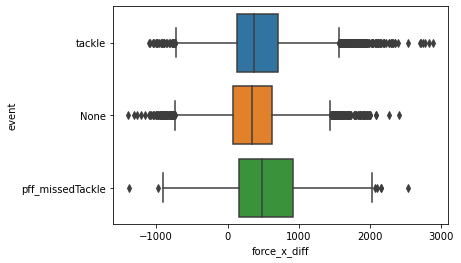

----------------------------------------------------
----------------------------------------------------
force_y_diff


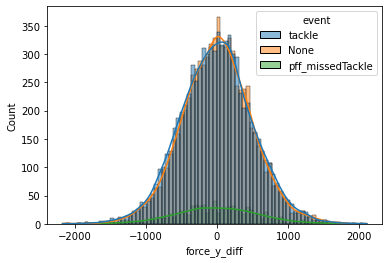

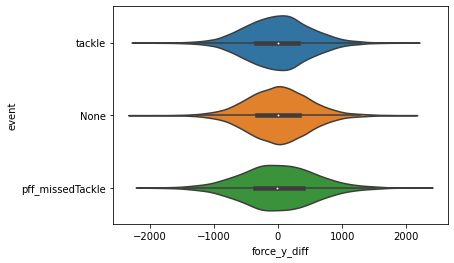

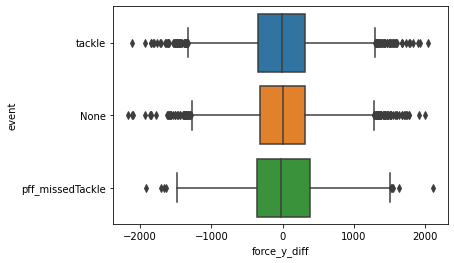

----------------------------------------------------
----------------------------------------------------
momentum_diff


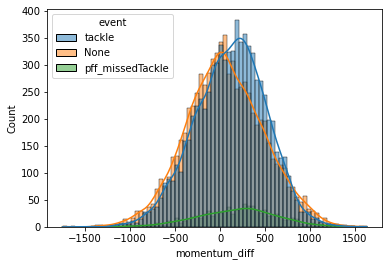

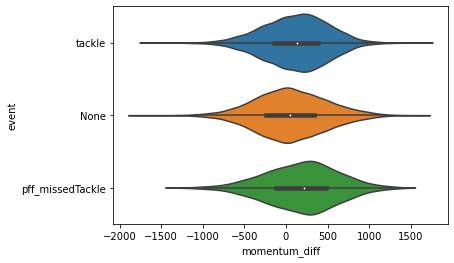

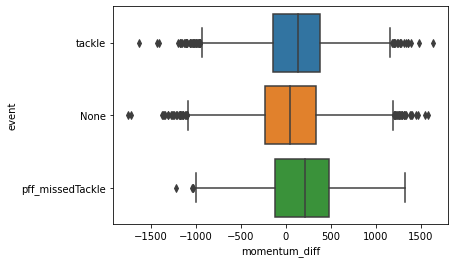

----------------------------------------------------
----------------------------------------------------
momentum_x_diff


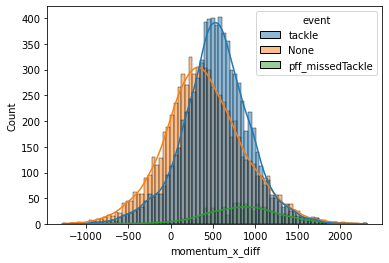

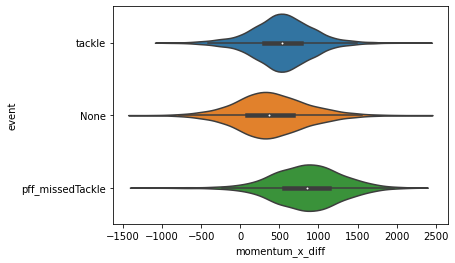

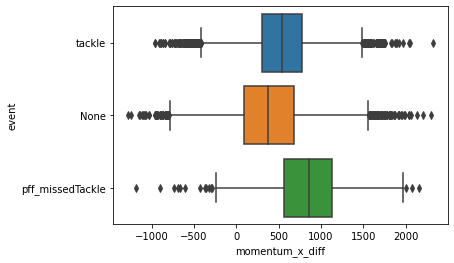

----------------------------------------------------
----------------------------------------------------
momentum_y_diff


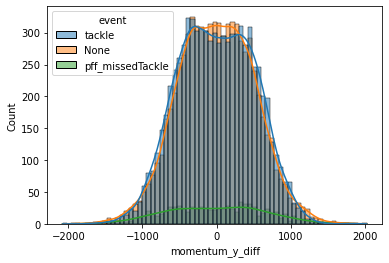

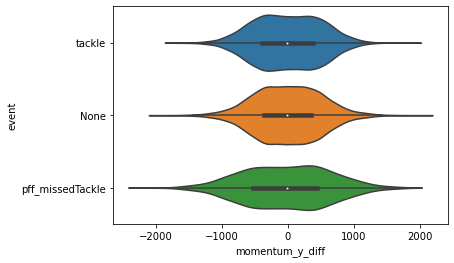

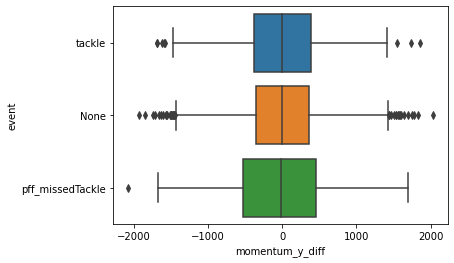

----------------------------------------------------
----------------------------------------------------
x_contact


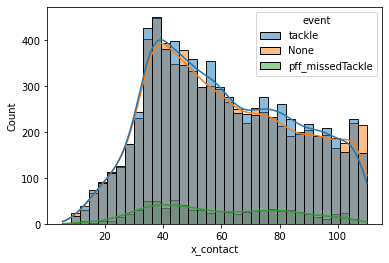

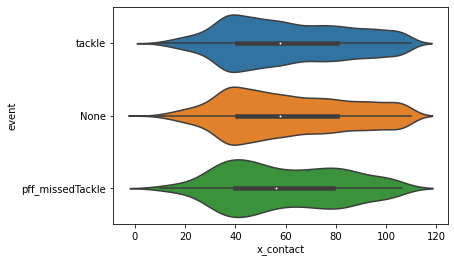

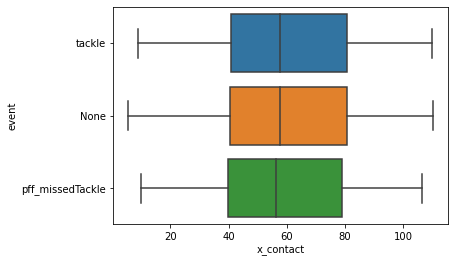

----------------------------------------------------
----------------------------------------------------
y_contact


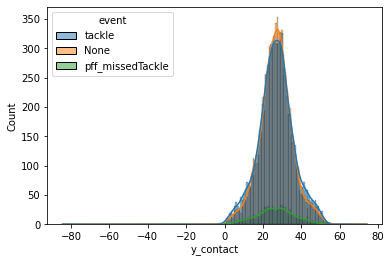

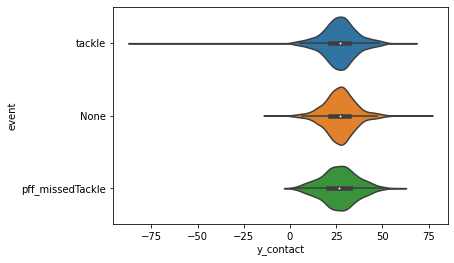

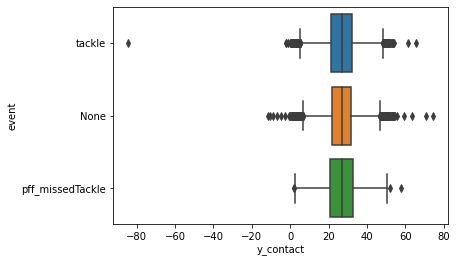

----------------------------------------------------
----------------------------------------------------
tackler_to_contact_dist


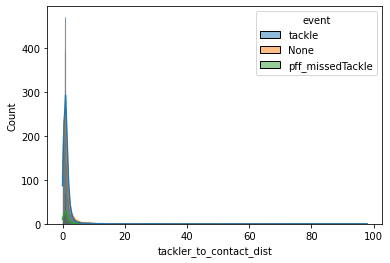

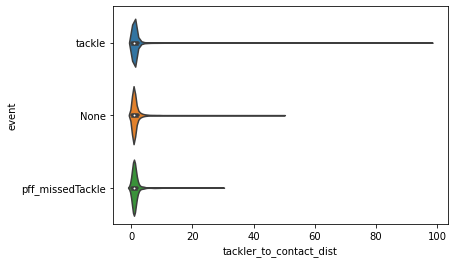

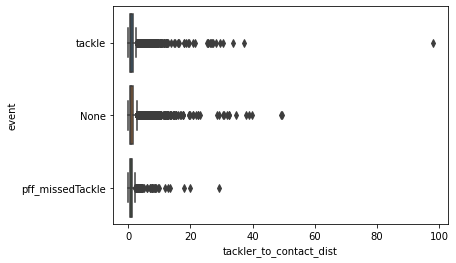

----------------------------------------------------
----------------------------------------------------
ball_carrier_to_contact_dist


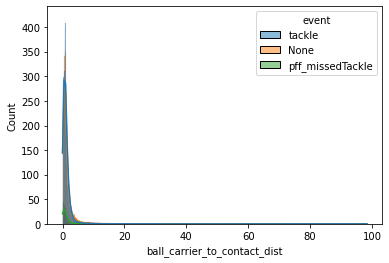

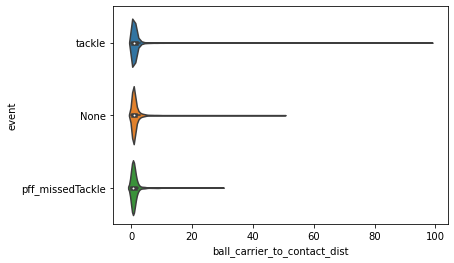

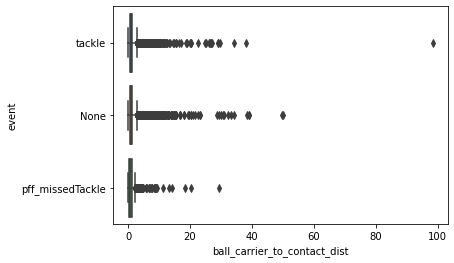

----------------------------------------------------
----------------------------------------------------
tackler_time_to_contact


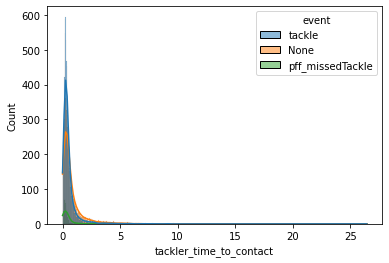

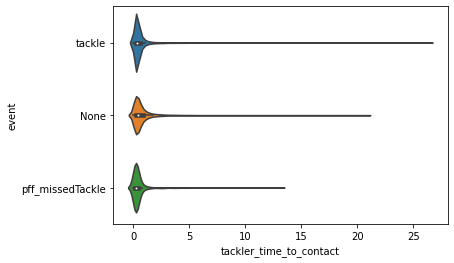

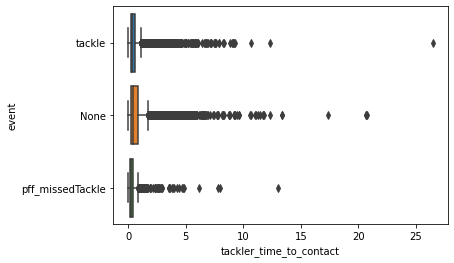

----------------------------------------------------
----------------------------------------------------
ball_carrier_time_to_contact


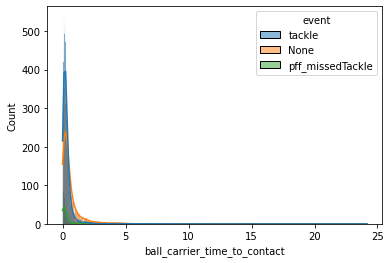

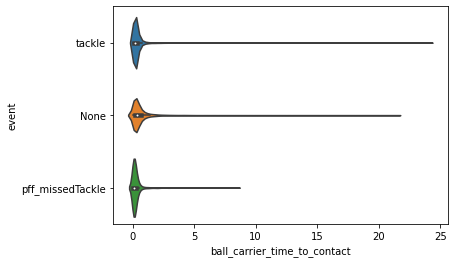

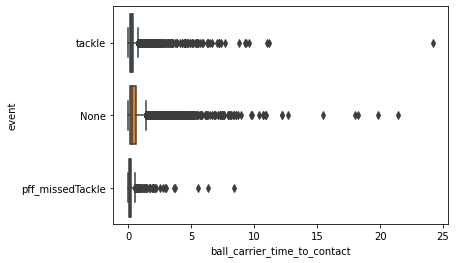

----------------------------------------------------
----------------------------------------------------
diff_time_to_contact


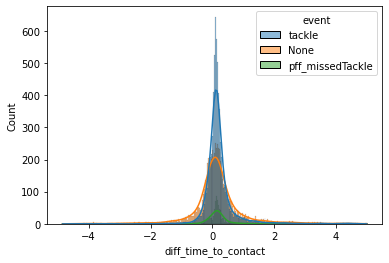

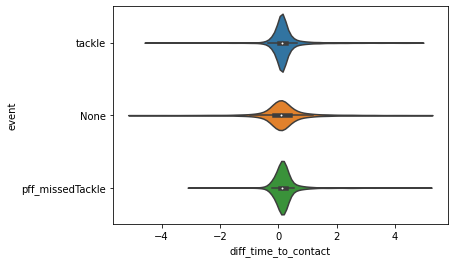

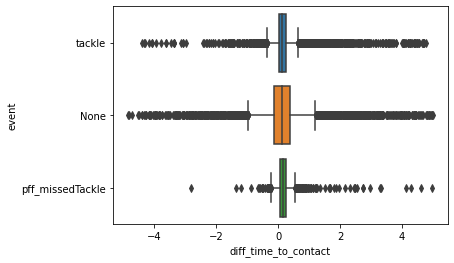

----------------------------------------------------
----------------------------------------------------
contact_angle


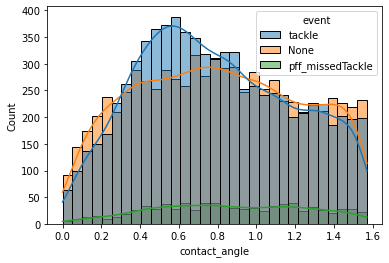

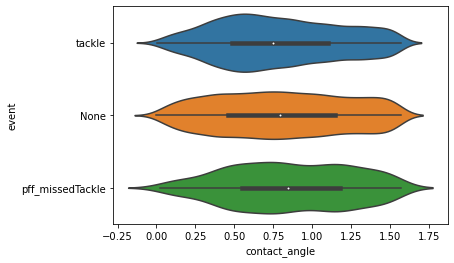

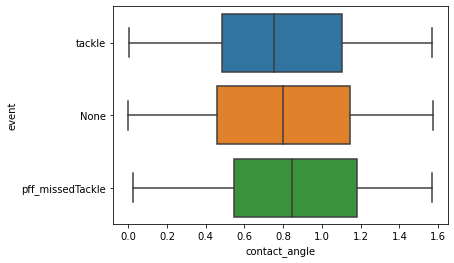

----------------------------------------------------
----------------------------------------------------
contact_angle_force_diff


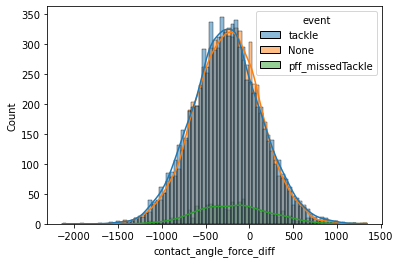

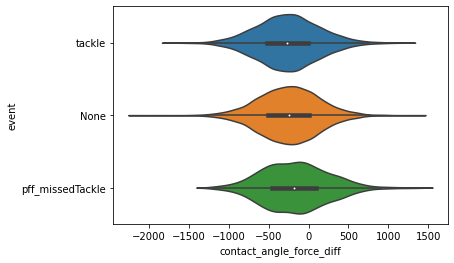

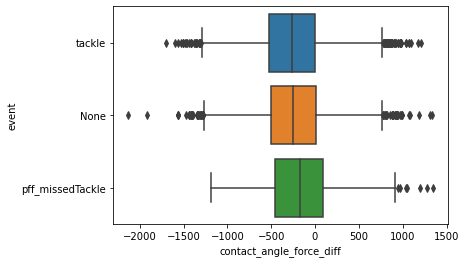

----------------------------------------------------
----------------------------------------------------


In [29]:
for metric in player_diff_metric_columns:
    print(metric)
    hist(df_contact, metric)
    violin(df_contact, metric)
    box(df_contact, metric)
    print("----------------------------------------------------")
    print("----------------------------------------------------")

# More Plotting

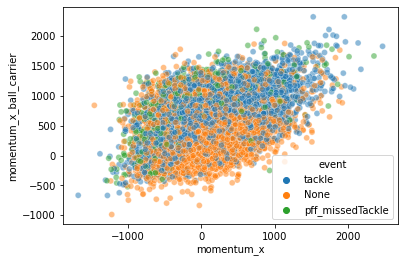

In [30]:
sns.scatterplot(metrics_df, x="momentum_x", y="momentum_x_ball_carrier", hue="event", alpha=0.5)

In [31]:
def regression(df, metric):
    ax = sns.scatterplot(df, x=metric, y=f"{metric}_ball_carrier", 
                         hue='event', hue_order=df['event'].unique(), alpha=0.3)
    for event_type in df['event'].unique():
        plotting_df = df.copy()
        plotting_df = plotting_df[plotting_df['event'] == event_type]
        sns.regplot(plotting_df, x=metric, y=f"{metric}_ball_carrier", scatter=False)
    plt.show()

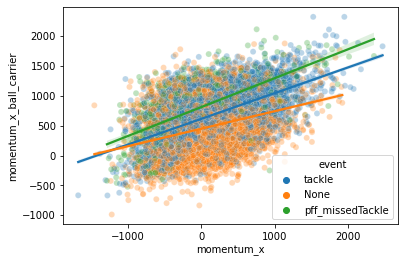

In [32]:
regression(metrics_df, "momentum_x")

In [33]:
scatter_metric_columns = ['x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'force', 'force_x', 'force_y', 'momentum', 'momentum_x',
       'momentum_y', 'in_phase']

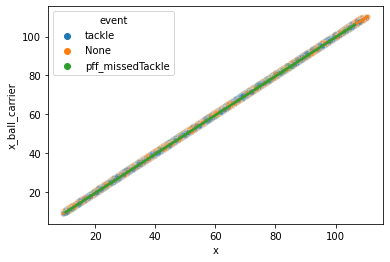

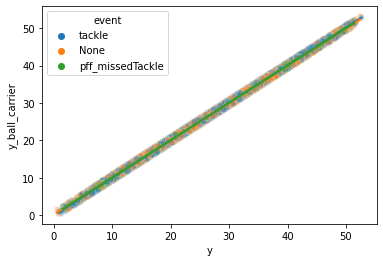

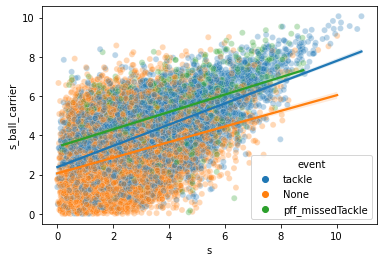

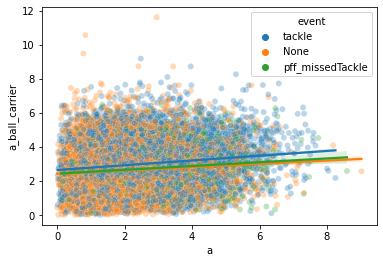

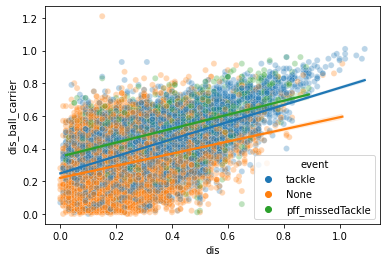

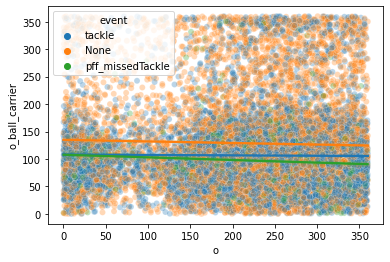

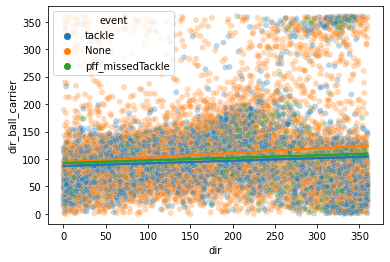

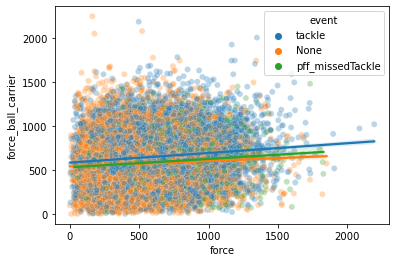

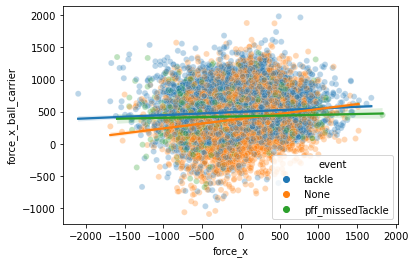

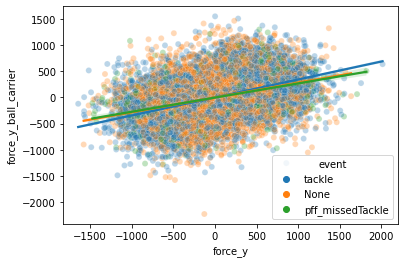

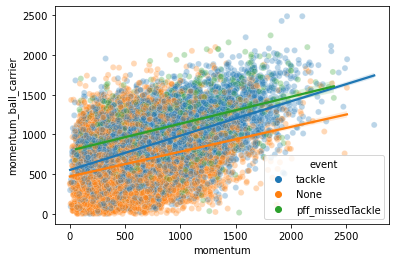

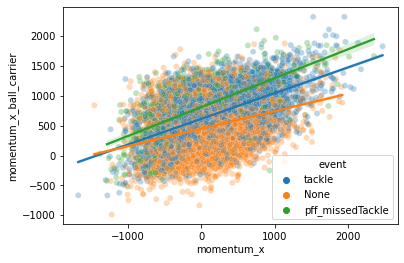

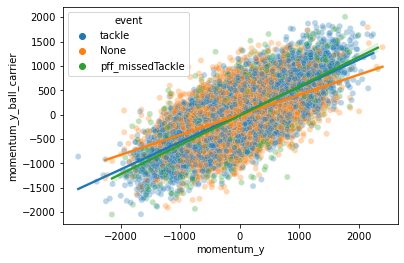

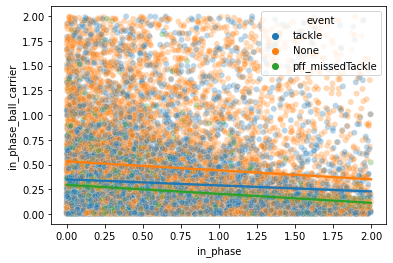

In [34]:
for metric_column in scatter_metric_columns:
    regression(metrics_df, metric_column)

# Field Location Plots

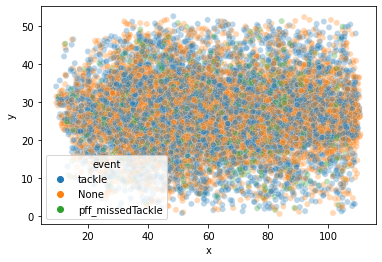

In [37]:
sns.scatterplot(metrics_df, x='x', y='y', 
                     hue='event', hue_order=metrics_df['event'].unique(), alpha=0.3)

## Add Line of Scrimage

In [53]:
plays_df['LOS'] = plays_df.apply(lambda x: (100 - x['yardlineNumber']) if x['yardlineSide'] == x['defensiveTeam'] else x['yardlineNumber'], axis=1)

In [57]:
new_metrics_df = metrics_df.merge(plays_df[['gameId', 'playId', 'LOS']], on=['gameId', 'playId'])

In [78]:
new_metrics_df['x_LOS'] = new_metrics_df['x'] - new_metrics_df['LOS']
new_metrics_df['x_LOS_ball_carrier'] = new_metrics_df['x_ball_carrier'] - new_metrics_df['LOS']

In [86]:
new_metrics_df['x_contact_LOS'] = new_metrics_df['x_contact'] - new_metrics_df['LOS']

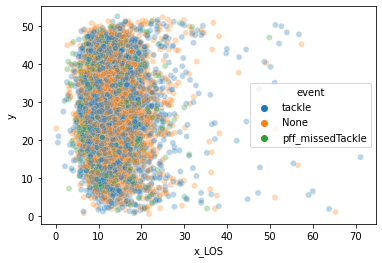

In [79]:
sns.scatterplot(new_metrics_df, x='x_LOS', y='y', 
                     hue='event', alpha=0.3)

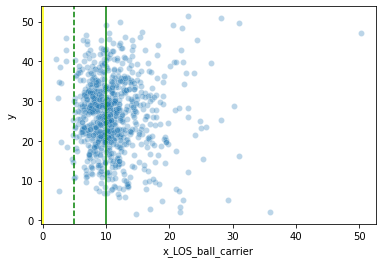

In [80]:
ax = sns.scatterplot(new_metrics_df[new_metrics_df['event'] == 'pff_missedTackle'],
                     x='x_LOS_ball_carrier', y='y', alpha=0.3)
ax.axvline(x=0, color='yellow')
ax.axvline(x=5, color='green', linestyle='--')
ax.axvline(x=10, color='green')

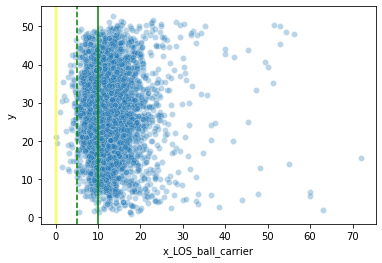

In [81]:
ax = sns.scatterplot(new_metrics_df[new_metrics_df['event'] == 'tackle'],
                     x='x_LOS_ball_carrier', y='y', alpha=0.3)
ax.axvline(x=0, color='yellow')
ax.axvline(x=5, color='green', linestyle='--')
ax.axvline(x=10, color='green')

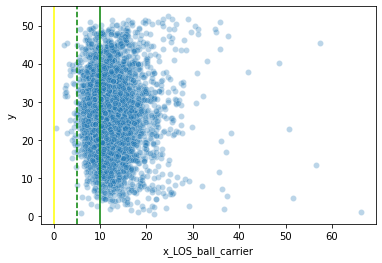

In [85]:
ax = sns.scatterplot(new_metrics_df[new_metrics_df['event'] == 'None'],
                     x='x_LOS_ball_carrier', y='y', alpha=0.3)
ax.axvline(x=0, color='yellow')
ax.axvline(x=5, color='green', linestyle='--')
ax.axvline(x=10, color='green')

(-10.0, 60.0)

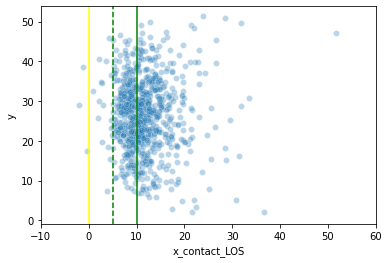

In [91]:
ax = sns.scatterplot(new_metrics_df[new_metrics_df['event'] == 'pff_missedTackle'],
                     x='x_contact_LOS', y='y', alpha=0.3)
ax.axvline(x=0, color='yellow')
ax.axvline(x=5, color='green', linestyle='--')
ax.axvline(x=10, color='green')
ax.set_xlim(-10, 60)

# Orientation vs Direction

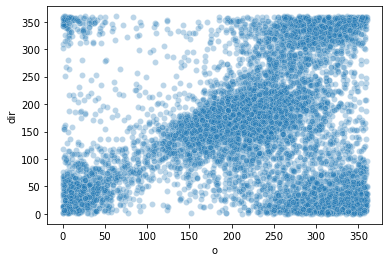

In [97]:
sns.scatterplot(metrics_df[metrics_df['event'] == 'tackle'], x='o', y='dir', alpha=0.3)

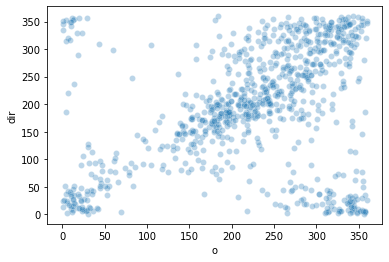

In [98]:
sns.scatterplot(metrics_df[metrics_df['event'] == 'pff_missedTackle'], x='o', y='dir', alpha=0.3)

## Speed v Weight

In [122]:
def regression_2(df, metric1, metric2):
    ax = sns.scatterplot(df, x=metric1, y=metric2, 
                         hue='event', hue_order=df['event'].unique(), alpha=0.3)
    for event_type in df['event'].unique():
        plotting_df = df.copy()
        plotting_df = plotting_df[plotting_df['event'] == event_type]
        sns.regplot(plotting_df, x=metric1, y=metric2, scatter=False)
    plt.show()

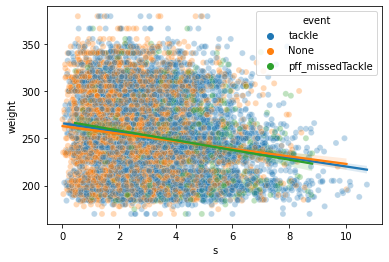

In [123]:
regression_2(contact_metrics_df, 's', 'weight')

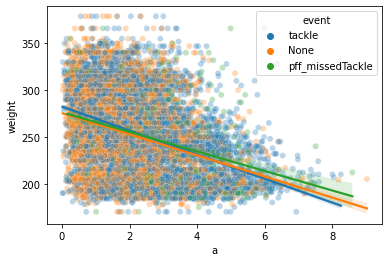

In [124]:
regression_2(contact_metrics_df, 'a', 'weight')

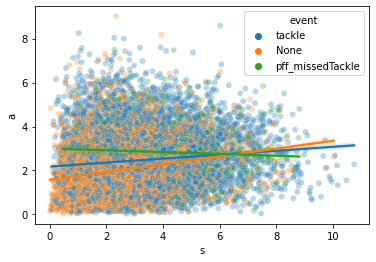

In [125]:
regression_2(contact_metrics_df, 's', 'a')

## Momentum_x v Momentum_y

Take the absolute value of the momentum in the y direction to normalize the plot

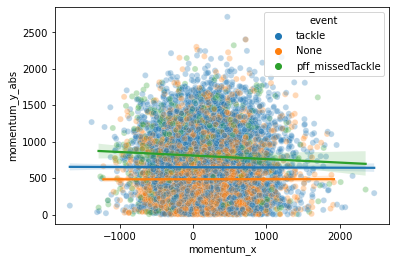

In [253]:
regression_2(contact_metrics_df, 'momentum_x', 'momentum_y_abs')

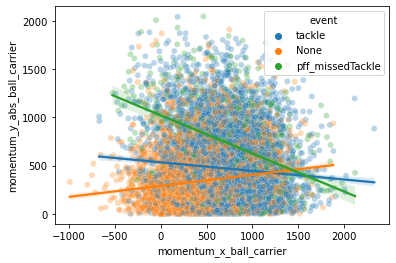

In [254]:
regression_2(contact_metrics_df, 'momentum_x_ball_carrier', 'momentum_y_abs_ball_carrier')

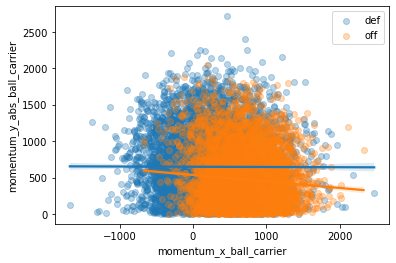

In [255]:
plotting_df = contact_metrics_df[contact_metrics_df['event'] == 'tackle']
ax = sns.regplot(plotting_df, x='momentum_x', y='momentum_y_abs',
                 label='def', scatter_kws={'alpha': 0.3})
sns.regplot(plotting_df, x='momentum_x_ball_carrier', y='momentum_y_abs_ball_carrier',
            label='off', scatter_kws={'alpha': 0.3})
plt.legend()
plt.show()

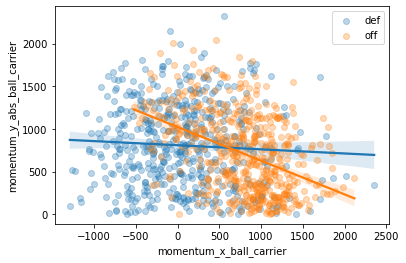

In [256]:
plotting_df = contact_metrics_df[contact_metrics_df['event'] == 'pff_missedTackle']
ax = sns.regplot(plotting_df, x='momentum_x', y='momentum_y_abs',
                 label='def', scatter_kws={'alpha': 0.3})
sns.regplot(plotting_df, x='momentum_x_ball_carrier', y='momentum_y_abs_ball_carrier',
            label='off', scatter_kws={'alpha': 0.3})
plt.legend()
plt.show()

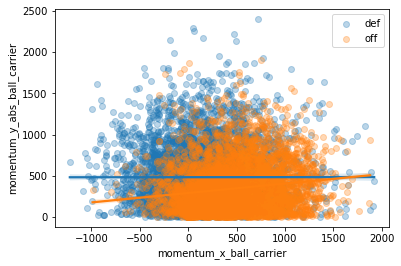

In [257]:
plotting_df = contact_metrics_df[contact_metrics_df['event'] == 'None']
ax = sns.regplot(plotting_df, x='momentum_x', y='momentum_y_abs',
                 label='def', scatter_kws={'alpha': 0.3})
sns.regplot(plotting_df, x='momentum_x_ball_carrier', y='momentum_y_abs_ball_carrier',
            label='off', scatter_kws={'alpha': 0.3})
plt.legend()
plt.show()

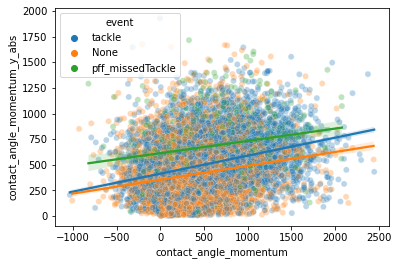

In [247]:
regression_2(contact_metrics_df, 'contact_angle_momentum', 'contact_angle_momentum_y_abs')

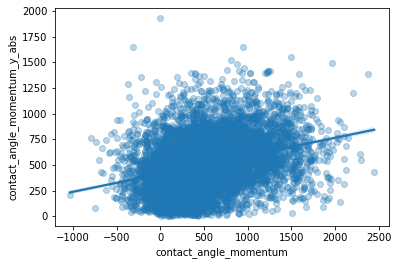

In [248]:
plotting_df = contact_metrics_df[contact_metrics_df['event'] == 'tackle']
sns.regplot(plotting_df, x='contact_angle_momentum', y='contact_angle_momentum_y_abs',
                 label='def', scatter_kws={'alpha': 0.3})

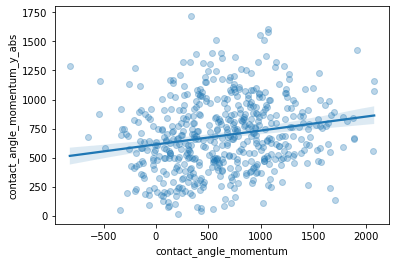

In [249]:
plotting_df = contact_metrics_df[contact_metrics_df['event'] == 'pff_missedTackle']
sns.regplot(plotting_df, x='contact_angle_momentum', y='contact_angle_momentum_y_abs',
                 label='def', scatter_kws={'alpha': 0.3})

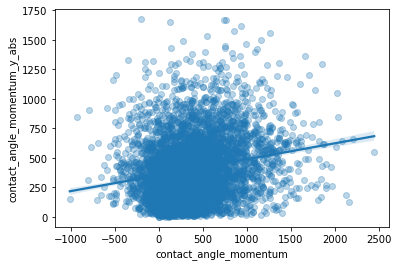

In [250]:
plotting_df = contact_metrics_df[contact_metrics_df['event'] == 'None']
sns.regplot(plotting_df, x='contact_angle_momentum', y='contact_angle_momentum_y_abs',
                 label='def', scatter_kws={'alpha': 0.3})

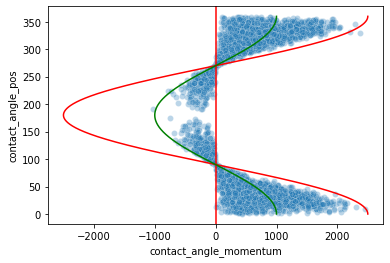

In [182]:
plotting_df = contact_metrics_df[contact_metrics_df['event'] == 'tackle']
ax = sns.scatterplot(plotting_df, 
                     x='contact_angle_momentum', y='contact_angle_pos', alpha=0.3)
ax.axvline(x=0, color='red')
angle = np.arange(0, 360, 0.1)
momentum = np.arange(-1000, 2500, 0.1)
cos_angle = np.cos(np.radians(angle))

ax.plot(cos_angle * 2500, angle, color='red')
ax.plot(cos_angle * 1000, angle, color='green')

The maximum momentum of any tackler moving in the "opposite" direction from the ball carrier (toward the oposite end zone when the ball carrier is moving perfectly downfield) is 1000 yard-pounds/second

The maximum momentum of any tackler moving the "same" direction as the ball carrier is slighly above 2500 yard-pounds/second

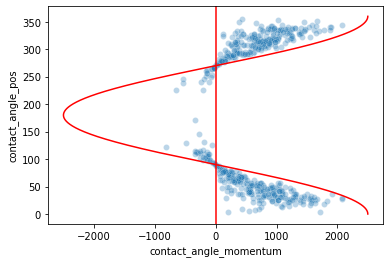

In [184]:
plotting_df = contact_metrics_df[contact_metrics_df['event'] == 'pff_missedTackle']
ax = sns.scatterplot(plotting_df, 
                     x='contact_angle_momentum', y='contact_angle_pos', alpha=0.3)
ax.axvline(x=0, color='red')
angle = np.arange(0, 360, 0.1)
momentum = np.arange(-1000, 2500, 0.1)
cos_angle = np.cos(np.radians(angle))

ax.plot(cos_angle * 2500, angle, color='red')

## Momentum_x Lowess Regression

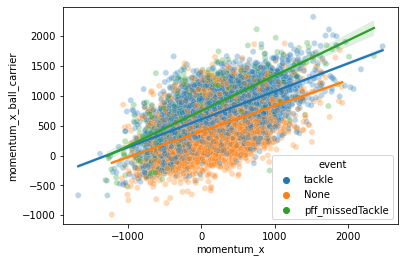

In [190]:
regression(contact_metrics_df, 'momentum_x')

In [270]:
def regression_lowess(df, metric):
    ax = sns.scatterplot(df, x=metric, y=f"{metric}_ball_carrier", 
                         hue='event', hue_order=df['event'].unique(), alpha=0.3)
    for event_type in df['event'].unique():
        plotting_df = df.copy()
        plotting_df = plotting_df[plotting_df['event'] == event_type]
        sns.lmplot(plotting_df, x=metric, y=f"{metric}_ball_carrier",
                   lowess=True, scatter=False)
    plt.show()

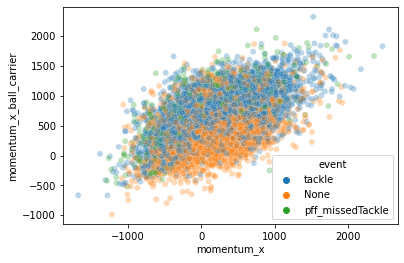

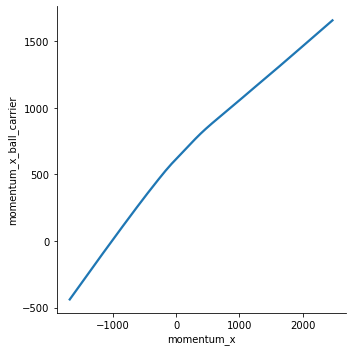

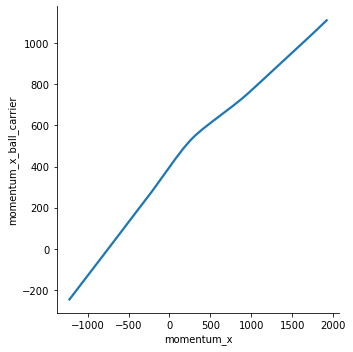

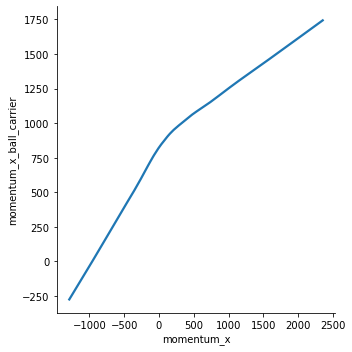

In [271]:
regression_lowess(contact_metrics_df, 'momentum_x')

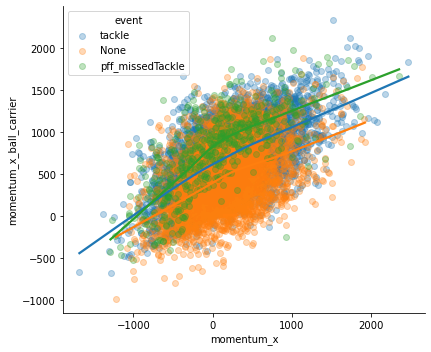

In [288]:
sns.lmplot(contact_metrics_df, x="momentum_x", y="momentum_x_ball_carrier", lowess=True,
           hue='event', hue_order=contact_metrics_df['event'].unique(), aspect=1.25,
           scatter_kws={'alpha': 0.3},
           facet_kws={'legend_out':False})

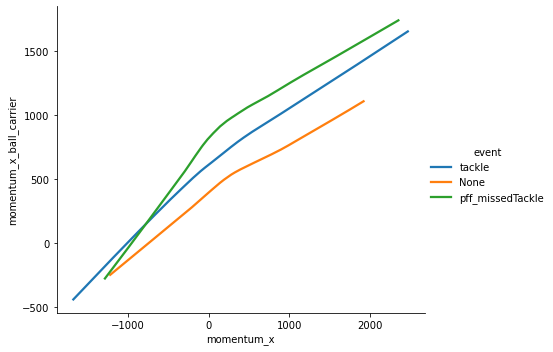

In [293]:
ax = sns.lmplot(contact_metrics_df, x="momentum_x", y="momentum_x_ball_carrier", lowess=True,
           hue='event', hue_order=contact_metrics_df['event'].unique(), aspect=1.25,
           scatter=False)
# ax.axvline(x=0, color='red')

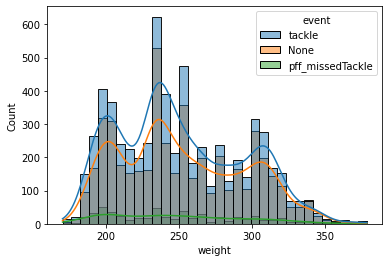

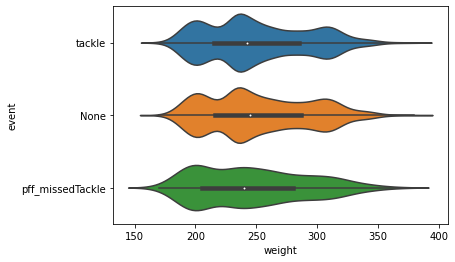

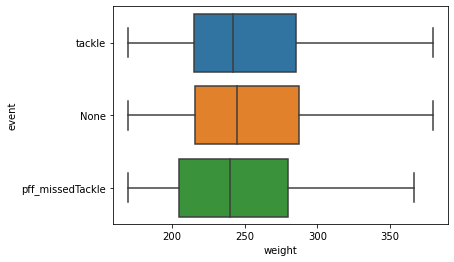

In [208]:
hist(contact_metrics_df, 'weight')
violin(contact_metrics_df, 'weight')
box(contact_metrics_df, 'weight')

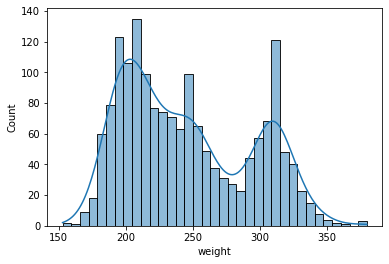

In [244]:
sns.histplot(players_df, x='weight', kde=True, bins=35)


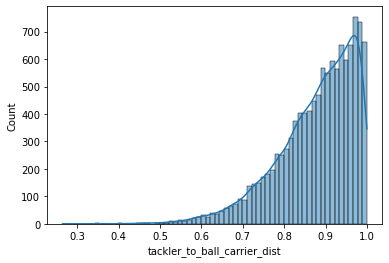

In [261]:
sns.histplot(contact_metrics_df, x='tackler_to_ball_carrier_dist', kde=True)

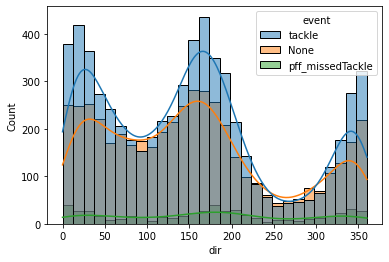

In [294]:
hist(contact_metrics_df, 'dir')

# Player Position Confounder

In [296]:
players_df.head()

nflId height  weight   birthDate     collegeName position     displayName
0  25511    6-4     225  1977-08-03        Michigan       QB       Tom Brady
1  29550    6-4     328  1982-01-22        Arkansas        T    Jason Peters
2  29851    6-2     225  1983-12-02      California       QB   Aaron Rodgers
3  30842    6-6     267  1984-05-19            UCLA       TE  Marcedes Lewis
4  33084    6-4     217  1985-05-17  Boston College       QB       Matt Ryan

In [297]:
weight_confounder_df = contact_metrics_df.merge(players_df[['nflId', 'position']], on='nflId')

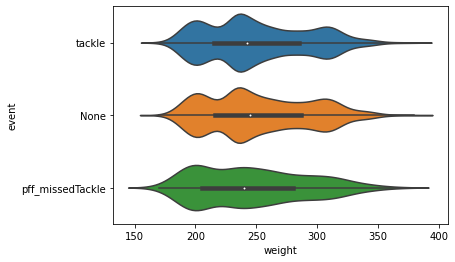

In [298]:
violin(weight_confounder_df, 'weight')

In [300]:
weight_confounder_df['position'].value_counts()

ILB    2145
OLB    2015
DT     2002
DE     1655
CB     1051
SS      962
FS      945
NT      595
MLB     199
DB       25
Name: position, dtype: int64

In [301]:
linemen = ['DT', 'DE', 'NT']
linebackers = ['ILB', 'OLB', 'MLB']
backs = ['CB', 'SS', 'FS', 'DB']

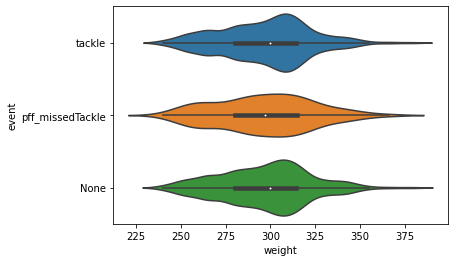

In [303]:
violin(weight_confounder_df[weight_confounder_df['position'].isin(linemen)], 'weight')

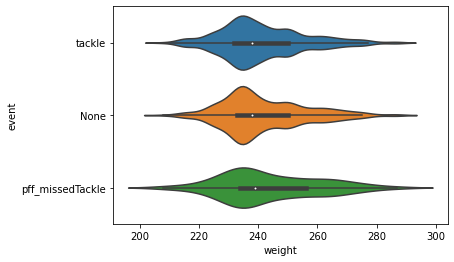

In [304]:
violin(weight_confounder_df[weight_confounder_df['position'].isin(linebackers)], 'weight')

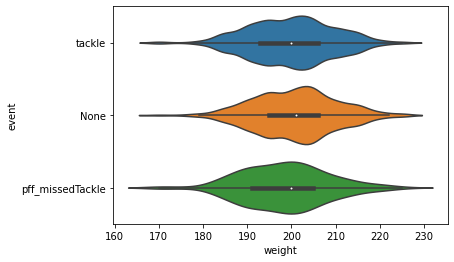

In [305]:
violin(weight_confounder_df[weight_confounder_df['position'].isin(backs)], 'weight')